In [ ]:
import pandas as pd
import geopandas as gpd
from pathlib import Path

# Load occurence data with only certain columns (save memory)
raw_occurence_df = pd.read_csv(Path('/media/store/Datasets/Occurences/occurrence.txt'), sep='\t', on_bad_lines='skip', usecols=['gbifID','informationWithheld','eventDate', 'eventTime','dateIdentified','decimalLatitude','decimalLongitude','genus','species'])

raw_occurence_df.columns

/tmp/ipykernel_6062/1878490605.py:8: DtypeWarning: Columns (18,63,97,136) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_occurence_df = pd.read_csv(Path('/media/store/Datasets/Occurences/occurrence.txt'), sep='\t', on_bad_lines='skip', usecols=['gbifID','informationWithheld','eventDate', 'eventTime','dateIdentified','decimalLatitude','decimalLongitude','genus','species'])


Index(['gbifID', 'informationWithheld', 'eventDate', 'eventTime',
       'decimalLatitude', 'decimalLongitude', 'dateIdentified', 'genus',
       'species'],
      dtype='object')

In [2]:
# Get entries that do not describe striped skunks
raw_occurence_df[raw_occurence_df['genus'] != 'Mephitis']

gbifID informationWithheld            eventDate       eventTime  \
0         3859129363                 NaN     2022-05-17T10:42  10:42:00-04:00   
1         3860455212                 NaN     2022-04-20T19:16  19:16:00-04:00   
2         3858737675                 NaN     2022-06-21T20:28  20:28:00-07:00   
3         3873231571                 NaN  2022-07-21T09:21:06  09:21:06-04:00   
4         3888759297                 NaN     2022-08-06T06:10  06:10:00-07:00   
...              ...                 ...                  ...             ...   
10791048   932726079                 NaN     2012-05-05T00:00             NaN   
10791049  2329536302                 NaN     2013-06-15T00:00             NaN   
10791050  4175275077                 NaN     2022-08-15T00:00             NaN   
10791051   920790353                 NaN     2012-04-29T00:00             NaN   
10791052  4176238290                 NaN     2023-05-25T00:00             NaN   

         decimalLatitude  decimalLongitude       dateIdentified      genus  \
0               31.96043        -81.054090  2022-05-27T19:54:02    Procyon   
1              41.626835        -83.189505  2022-06-10T20:43:54    Procyon   
2              40.877589       -124.085622  2022-06-22T03:30:53    Procyon   
3                37.5045        -77.411112  2022-07-21T13:31:02    Procyon   
4              32.793254       -117.092092  2022-08-06T22:29:16  Didelphis   
...                  ...               ...                  ...        ...   
10791048       40.657131        -79.701981                  NaN      Buteo   
10791049       41.582947        -79.978554                  NaN    Procyon   
10791050       40.066151        -85.987129                  NaN      Buteo   
10791051       41.124821        -80.205513                  NaN      Buteo   
10791052       40.783539        -73.964088                  NaN    Procyon   

                       species  
0                Procyon lotor  
1                Procyon lotor  
2                Procyon lotor  
3                Procyon lotor  
4         Didelphis virginiana  
...                        ...  
10791048     Buteo jamaicensis  
10791049         Procyon lotor  
10791050     Buteo jamaicensis  
10791051     Buteo jamaicensis  
10791052         Procyon lotor  

[10774755 rows x 9 columns]

In [3]:
raw_occurence_df[['decimalLongitude', 'decimalLatitude']]

decimalLongitude decimalLatitude
0               -81.054090        31.96043
1               -83.189505       41.626835
2              -124.085622       40.877589
3               -77.411112         37.5045
4              -117.092092       32.793254
...                    ...             ...
10791048        -79.701981       40.657131
10791049        -79.978554       41.582947
10791050        -85.987129       40.066151
10791051        -80.205513       41.124821
10791052        -73.964088       40.783539

[10791053 rows x 2 columns]

# Data Cleaning
The plan of attack for cleaning this database is as follows:
- Search dataframe for relevant columns (`decimalLongitude`, `species`, etc)
- Remove entries without any dates

In [ ]:
# Shrink dataframe to relevant columns
occurence_df = raw_occurence_df[['gbifID','informationWithheld','eventDate', 'eventTime','dateIdentified','decimalLatitude','decimalLongitude','genus','species',]]

# Remove entries without any dates
dateless_df = occurence_df[occurence_df['eventDate'].isnull() & occurence_df['eventTime'].isnull() & occurence_df['dateIdentified'].isnull()]
occurence_df = occurence_df[~occurence_df.loc[:, 'gbifID'].isin(dateless_df['gbifID'])]
occurence_df

gbifID informationWithheld            eventDate       eventTime  \
0         3859129363                 NaN     2022-05-17T10:42  10:42:00-04:00   
1         3860455212                 NaN     2022-04-20T19:16  19:16:00-04:00   
2         3858737675                 NaN     2022-06-21T20:28  20:28:00-07:00   
3         3873231571                 NaN  2022-07-21T09:21:06  09:21:06-04:00   
4         3888759297                 NaN     2022-08-06T06:10  06:10:00-07:00   
...              ...                 ...                  ...             ...   
10791048   932726079                 NaN     2012-05-05T00:00             NaN   
10791049  2329536302                 NaN     2013-06-15T00:00             NaN   
10791050  4175275077                 NaN     2022-08-15T00:00             NaN   
10791051   920790353                 NaN     2012-04-29T00:00             NaN   
10791052  4176238290                 NaN     2023-05-25T00:00             NaN   

               dateIdentified decimalLatitude  decimalLongitude      genus  \
0         2022-05-27T19:54:02        31.96043        -81.054090    Procyon   
1         2022-06-10T20:43:54       41.626835        -83.189505    Procyon   
2         2022-06-22T03:30:53       40.877589       -124.085622    Procyon   
3         2022-07-21T13:31:02         37.5045        -77.411112    Procyon   
4         2022-08-06T22:29:16       32.793254       -117.092092  Didelphis   
...                       ...             ...               ...        ...   
10791048                  NaN       40.657131        -79.701981      Buteo   
10791049                  NaN       41.582947        -79.978554    Procyon   
10791050                  NaN       40.066151        -85.987129      Buteo   
10791051                  NaN       41.124821        -80.205513      Buteo   
10791052                  NaN       40.783539        -73.964088    Procyon   

                       species  
0                Procyon lotor  
1                Procyon lotor  
2                Procyon lotor  
3                Procyon lotor  
4         Didelphis virginiana  
...                        ...  
10791048     Buteo jamaicensis  
10791049         Procyon lotor  
10791050     Buteo jamaicensis  
10791051     Buteo jamaicensis  
10791052         Procyon lotor  

[10791053 rows x 9 columns]

# Explore and Plot Dataset

In [9]:
# Print list of species
occurence_df['species'].unique()

array(['Procyon lotor', 'Didelphis virginiana', 'Buteo jamaicensis',
       'Canis latrans', 'Bubo virginianus', 'Lynx rufus', 'Vulpes vulpes',
       'Mephitis mephitis', 'Canis lupus', 'Spilogale putorius',
       'Vulpes velox', 'Bubo virginianus (J.F.Gmelin, 1788)', nan],
      dtype=object)

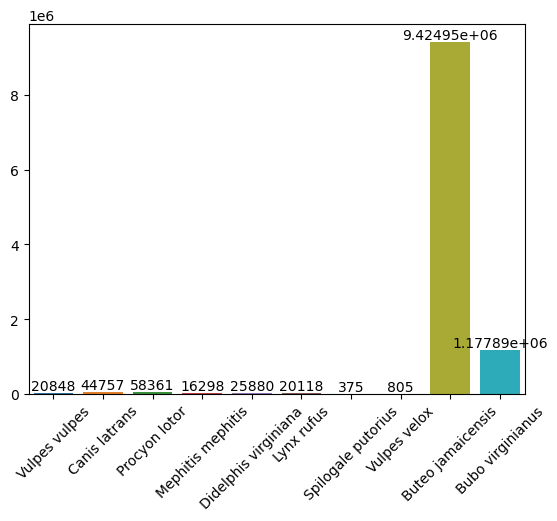

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and plot count of all species
species_counts = pd.DataFrame(
    data = {
        'Vulpes vulpes': len(occurence_df[occurence_df['species'] == 'Vulpes vulpes']),
        'Canis latrans': len(occurence_df[occurence_df['species'] == 'Canis latrans']),
        'Procyon lotor': len(occurence_df[occurence_df['species'] == 'Procyon lotor']),
        'Mephitis mephitis': len(occurence_df[occurence_df['species'] == 'Mephitis mephitis']),
        'Didelphis virginiana': len(occurence_df[occurence_df['species'] == 'Didelphis virginiana']),
        'Lynx rufus': len(occurence_df[occurence_df['species'] == 'Lynx rufus']),
        'Spilogale putorius': len(occurence_df[occurence_df['species'] == 'Spilogale putorius']),
        'Vulpes velox': len(occurence_df[occurence_df['species'] == 'Vulpes velox']),
        'Buteo jamaicensis':  len(occurence_df[occurence_df['species'] == 'Buteo jamaicensis']),
        'Bubo virginianus': len(occurence_df[occurence_df['species'] == 'Bubo virginianus'])},
    index = [0]
)

# Transpose counts to make plotting easier
spcies_counts = species_counts.T

ax = sns.barplot(species_counts, width = 1, gap = 0.2, hue=None)
ax.tick_params(axis='x', labelrotation=45)
for col in ax.containers:
    ax.bar_label(col, fontsize=10)

In [ ]:
# The dataset is very large, and we only care about instances of Spilogale
# so, remove all occurences that are not close to an instance of spilogale
max_lat = occurence_df[occurence_df['species'] == 'Spilogale putorius']['decimalLatitude'].max()
min_lat = occurence_df[occurence_df['species'] == 'Spilogale putorius']['decimalLatitude'].min()

max_long = occurence_df[occurence_df['species'] == 'Spilogale putorius']['decimalLongitude'].max()
min_long = occurence_df[occurence_df['species'] == 'Spilogale putorius']['decimalLongitude'].min()

print(max_lat, min_lat)
print(max_long, min_long)

# Drop rows where latitude is not a float
relevant_df = occurence_df[occurence_df['decimalLatitude'].apply(type) == float]

# Drop rows where longitude is not a float
relevant_df = relevant_df[relevant_df['decimalLongitude'].apply(type) == float]

# Keep only occurence in min/max range of Spilogale
relevant_df = relevant_df[(relevant_df['decimalLatitude'].between(min_lat - 0.5, max_lat + 0.5)) & (relevant_df['decimalLongitude'].between(min_long - 0.5, max_long + 0.5))]

45.128153 25.631646
-79.206586 -110.34734


In [ ]:
min_lats = occurence_df[occurence_df['species'] == 'Spilogale putorius']['decimalLatitude']
max_lats = min_lats + 0.5
min_lats = min_lats - 0.5

min_longs = occurence_df[occurence_df['species'] == 'Spilogale putorius']['decimalLongitude']
max_longs = min_longs + 0.5
min_longs = min_longs - 0.5

# Drop rows where latitude is not a float
relevant_df = occurence_df[occurence_df['decimalLatitude'].apply(type) == float]

# Drop rows where longitude is not a float
relevant_df = relevant_df[relevant_df['decimalLongitude'].apply(type) == float]

print(len(min_lats))
print(len(max_lats))
print(type(min_lats))

min_lats = min_lats.values
max_lats = max_lats.values

print(len(min_lats))
print(len(max_lats))
print(type(min_lats))
print(min_lats.size)

min_longs = min_longs.values
max_longs = max_longs.values

relevant_df = relevant_df[(relevant_df['decimalLatitude'].between(min_lats, max_lats)) & (relevant_df['decimalLongitude'].between(min_longs, max_longs))]
relevant_df

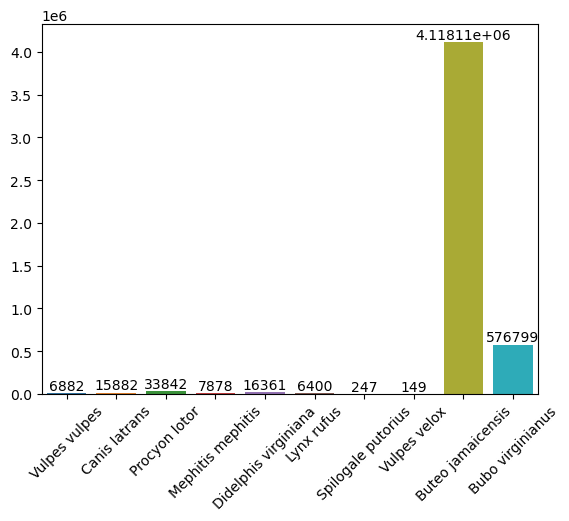

In [ ]:
# Calculate and plot count of all species after filtering dataset to occurences near Spilogale
species_counts = pd.DataFrame(
    data = {
        'Vulpes vulpes': len(relevant_df[relevant_df['species'] == 'Vulpes vulpes']),
        'Canis latrans': len(relevant_df[relevant_df['species'] == 'Canis latrans']),
        'Procyon lotor': len(relevant_df[relevant_df['species'] == 'Procyon lotor']),
        'Mephitis mephitis': len(relevant_df[relevant_df['species'] == 'Mephitis mephitis']),
        'Didelphis virginiana': len(relevant_df[relevant_df['species'] == 'Didelphis virginiana']),
        'Lynx rufus': len(relevant_df[relevant_df['species'] == 'Lynx rufus']),
        'Spilogale putorius': len(relevant_df[relevant_df['species'] == 'Spilogale putorius']),
        'Vulpes velox': len(relevant_df[relevant_df['species'] == 'Vulpes velox']),
        'Buteo jamaicensis':  len(relevant_df[relevant_df['species'] == 'Buteo jamaicensis']),
        'Bubo virginianus': len(relevant_df[relevant_df['species'] == 'Bubo virginianus'])},
    index = [0]
)

# Transpose counts to make plotting easier
spcies_counts = species_counts.T

ax = sns.barplot(species_counts, width = 1, gap = 0.2, hue=None)
ax.tick_params(axis='x', labelrotation=45)
for col in ax.containers:
    ax.bar_label(col, fontsize=10)

In [ ]:
# Calculate and plot count of all species during years of interest
years = [
    2000, 2001, 2002, 2003,
    2004, 2005, 2006, 2007, 2008,
    2009, 2010, 2011, 2012, 2013,
    2014, 2015, 2016, 2017, 2018,
    2019, 2020, 2021, 2022, 2023
]

def get_year(event_date) -> pd.DataFrame:
    if pd.isna(event_date):
        return 0000

    try:
        event_date = pd.to_datetime(event_date)
    except ValueError:
        return 0000
    return event_date.year

relevant_df['observationYear'] = relevant_df['eventDate'].apply(lambda x: get_year(x))

# The dataset should only contain the years we want
relevant_species_df = relevant_df[relevant_df['observationYear'] != 0000]

species_counts = pd.DataFrame(
    data = {
        'Vulpes vulpes': len(relevant_species_df[relevant_species_df['species'] == 'Vulpes vulpes']),
        'Canis latrans': len(relevant_species_df[relevant_species_df['species'] == 'Canis latrans']),
        'Procyon lotor': len(relevant_species_df[relevant_species_df['species'] == 'Procyon lotor']),
        'Mephitis mephitis': len(relevant_species_df[relevant_species_df['species'] == 'Mephitis mephitis']),
        'Didelphis virginiana': len(relevant_species_df[relevant_species_df['species'] == 'Didelphis virginiana']),
        'Lynx rufus': len(relevant_species_df[relevant_species_df['species'] == 'Lynx rufus']),
        'Spilogale putorius': len(relevant_species_df[relevant_species_df['species'] == 'Spilogale putorius']),
        'Vulpes velox': len(occurence_df[occurence_df['species'] == 'Vulpes velox']),
        'Buteo jamaicensis':  len(occurence_df[occurence_df['species'] == 'Buteo jamaicensis']),
        'Bubo virginianus': len(occurence_df[occurence_df['species'] == 'Bubo virginianus'])},
    index = [0]
)

# Transpose counts to make things easier
spcies_counts = species_counts.T

ax = sns.barplot(species_counts, width = 1, gap = 0.2, hue=None)
ax.tick_params(axis='x', labelrotation=45)
for col in ax.containers:
    ax.bar_label(col, fontsize=10)

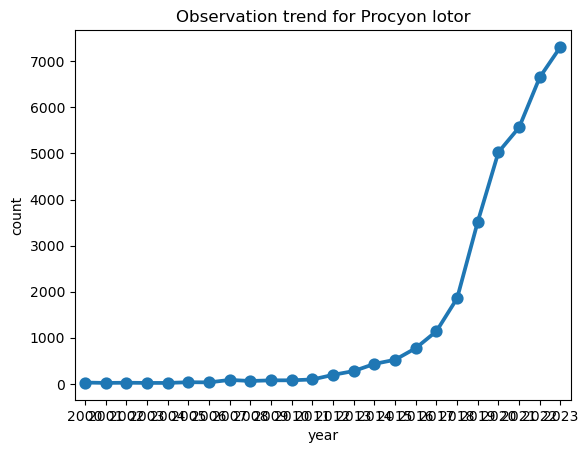

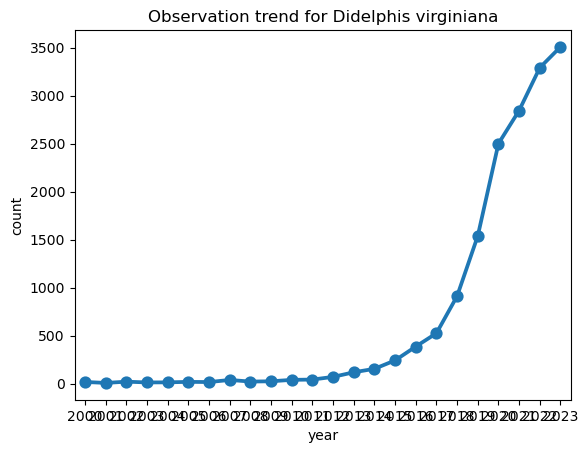

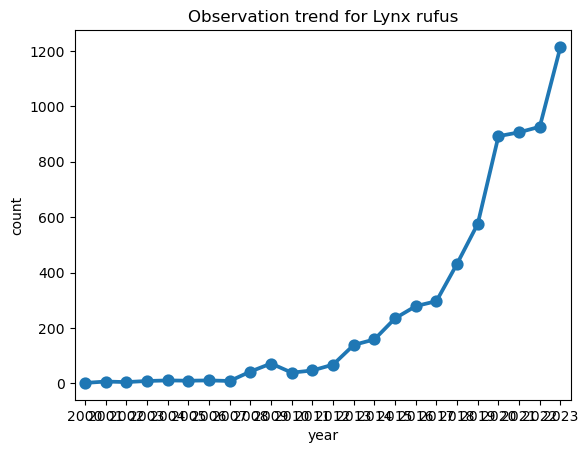

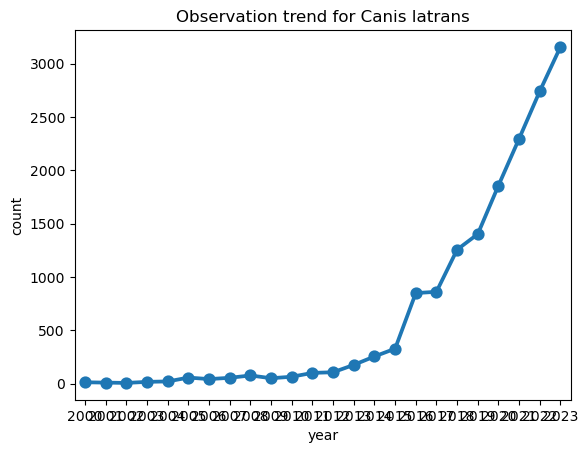

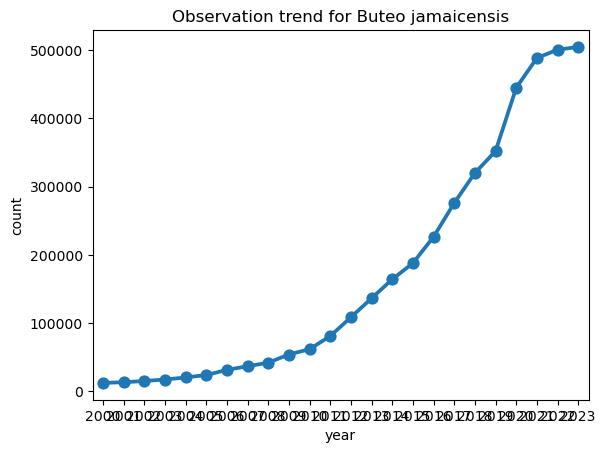

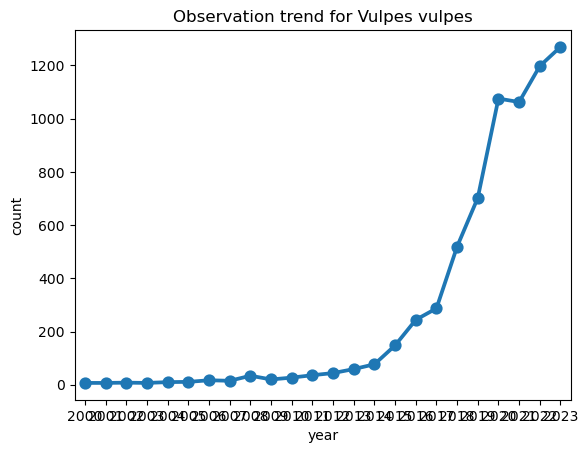

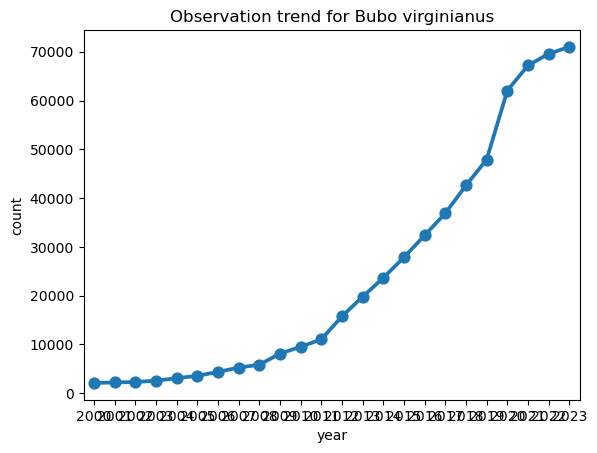

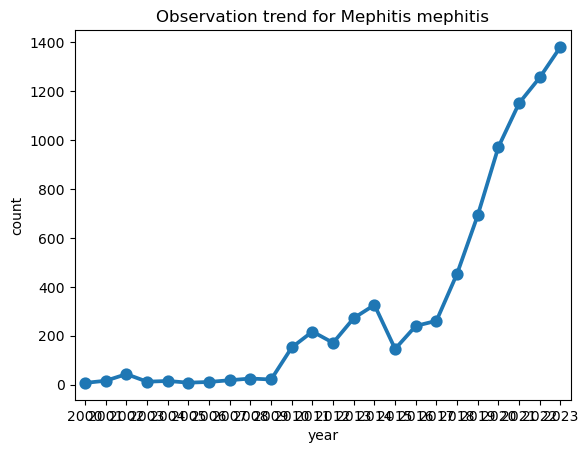

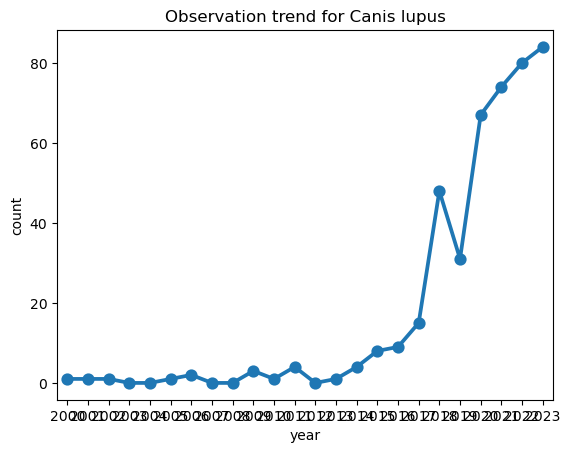

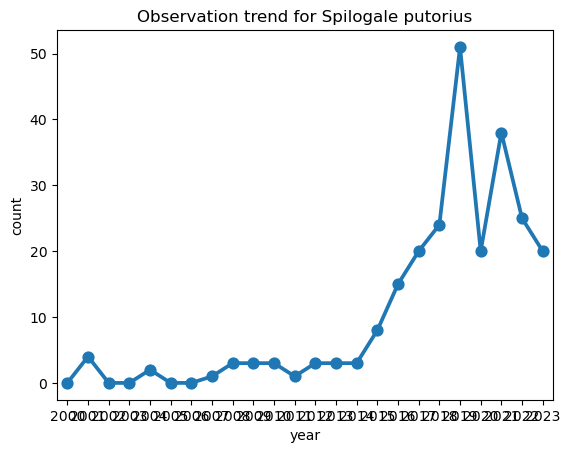

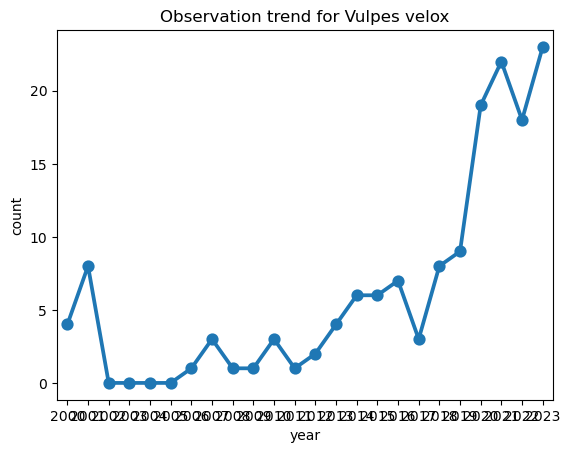

In [61]:
species = relevant_species_df['species'].unique()

for critter in species:
    year_trend = pd.DataFrame(columns = ['year', 'count'])
    for year in years:
        critter_df = relevant_species_df[relevant_species_df['species'] == critter]
        count = len(critter_df[critter_df['observationYear'] == year])
        year_trend.loc[len(year_trend.index)] = [year, count]
    ax = sns.pointplot(data=year_trend, x='year', y='count')
    ax.set_title(f"Observation trend for {critter}")
    plt.show()

### National Land Cover Database Analysis

In [ ]:
# Initial tests to query data from the raster dataset

from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from pyproj import Transformer

# Load NLCD dataset
land_cover = rasterio.open('Annual_NLCD_LndCov_2021_CU_C1V0.tif')
print(land_cover.meta)

coord_1 = [41.291770, -72.376200]
coord_2 = [37.3, -93.6]

transformer = Transformer.from_crs('epsg:4326', land_cover.crs)

e0, n0 = transformer.transform(coord_1[0], coord_1[1])
print(e0, n0)

e1, n1 = transformer.transform(coord_2[0], coord_2[1])
print(e1, n1)

print(land_cover.index(-72.376200, 41.291770))
print(land_cover.index(41.291770, -72.376200))

for val in land_cover.sample([(e0, n0)]):
    print(val) # Should get '23'

for val in land_cover.sample([(e1, n1)]):
    print(val) # Should get '81'


# NOTE: This will use a lot of RAM, be advised
# plt.figure(figsize=(10, 10))
# plt.imshow(data_array[0:50000])
# plt.colorbar()

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 250.0, 'width': 160000, 'height': 105000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, -2415585.0,
       0.0, -30.0, 3314805.0)}
1942986.7541182141 2274407.2013467485
210713.99141510655 1587033.8446640447
(110492, 80517)
(110495, 80520)
[250]
[250]
[250]
[250]
[23]
[81]


In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from pyproj import Transformer

# Get landcover type for each observation during the year of observation
def get_land_cover(latitude, longitude, transformer, raster):
    easting, northing = transformer.transform(latitude, longitude)
    for val in raster.sample([(easting, northing)]):
        return val[0]

rasters = {
    2000: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2000_CU_C1V0.tif',
    2001: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2001_CU_C1V0.tif',
    2002: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2002_CU_C1V0.tif',
    2003: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2003_CU_C1V0.tif',
    2004: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2004_CU_C1V0.tif',
    2005: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2005_CU_C1V0.tif',
    2006: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2006_CU_C1V0.tif',
    2007: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2007_CU_C1V0.tif',
    2008: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2008_CU_C1V0.tif',
    2009: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2009_CU_C1V0.tif',
    2010: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2010_CU_C1V0.tif',
    2011: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2011_CU_C1V0.tif',
    2012: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2012_CU_C1V0.tif',
    2013: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2013_CU_C1V0.tif',
    2014: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2014_CU_C1V0.tif',
    2015: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2015_CU_C1V0.tif',
    2016: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2016_CU_C1V0.tif',
    2017: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2017_CU_C1V0.tif',
    2018: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2018_CU_C1V0.tif',
    2019: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2019_CU_C1V0.tif',
    2020: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2020_CU_C1V0.tif',
    2021: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2021_CU_C1V0.tif',
    2022: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2022_CU_C1V0.tif',
    2023: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2023_CU_C1V0.tif'
}

for year, raster in rasters.items():
    print(f'On year {year}')
    land_cover = rasterio.open(raster)
    transformer = Transformer.from_crs('epsg:4326', land_cover.crs)
    relevant_species_df.loc[relevant_species_df['observationYear'] == year, 'landCoverBand'] = relevant_species_df.apply(lambda x: get_land_cover(x['decimalLatitude'], x['decimalLongitude'], transformer, land_cover), axis=1)

relevant_species_df['landCoverBand'] = relevant_species_df['landCoverBand'].astype(int)
relevant_species_df

In [ ]:
# Write the dataframe to a CSV file
relevant_species_df.to_csv('/home/draugr/Downloads/relevant_species_df.csv', sep='\t', encoding='utf-8', index=False, header=True)

In [93]:
# Print list of unique land cover values
relevant_species_df['landCoverBand'].unique()

array([ 95,  23,  71,  22,  42,  52,  24,  81,  21,  90,  41,  31,  43,
        82,  11, 250,  12])

In [94]:
# Load land cover legend dictionary
landcover_types = {
    11: 'Open Water',
    12: 'Perennial Ice/Snow',
    21: 'Developed, Open Space',
    22: 'Developed, Low Intensity',
    23: 'Developed, Medium Intensity',
    24: 'Developed, High Intensity',
    31: 'Barren Land (Rock/Sand/Clay)',
    41: 'Deciduous Forest',
    42: 'Evergreen Forest',
    43: 'Mixed Forest',
    51: 'Dwarf Scrub (Alaska Only)',
    52: 'Shrub/Scrub',
    71: 'Grassland/Herbaceous',
    72: 'Sedge/Hebaceous (Alaska Only)',
    73: 'Lichens (Alaska Only)',
    74: 'Moss (Alaska Only)',
    81: 'Pasture/Hay',
    82: 'Cultivated Crops',
    90: 'Woody Wetlands',
    95: 'Emergent Herbaceous Wetlands',
}

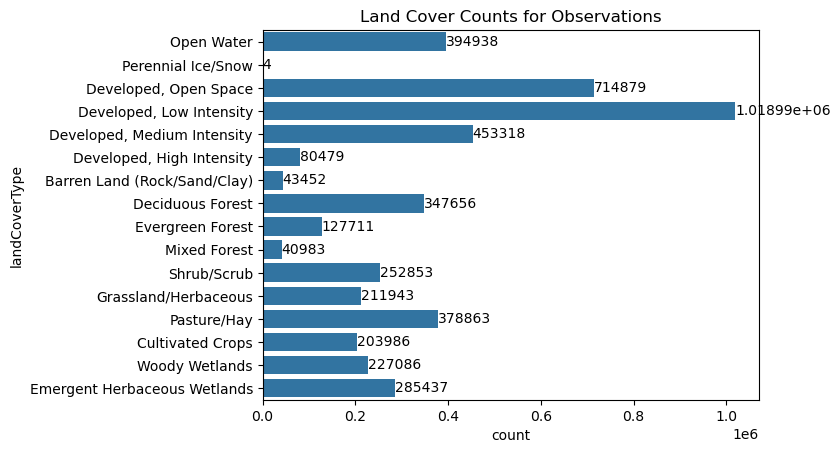

In [95]:
# Plot count of occurences for each land cover type
landcover_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])

for band, value in landcover_types.items():
    count = len(relevant_species_df[relevant_species_df['landCoverBand'] == band])
    landcover_counts.loc[len(landcover_counts.index)] = [band, value, count]

landcover_counts = landcover_counts.drop(landcover_counts[landcover_counts['count'] == 0].index)

ax = sns.barplot(data=landcover_counts, y='landCoverType', x='count', orient='y')
ax.set_title(f"Land Cover Counts for Observations")
for col in ax.containers:
    ax.bar_label(col, fontsize=10)
plt.show()

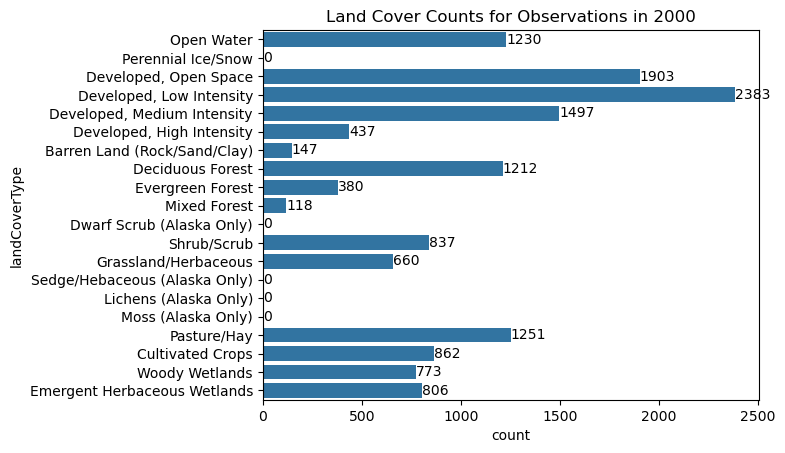

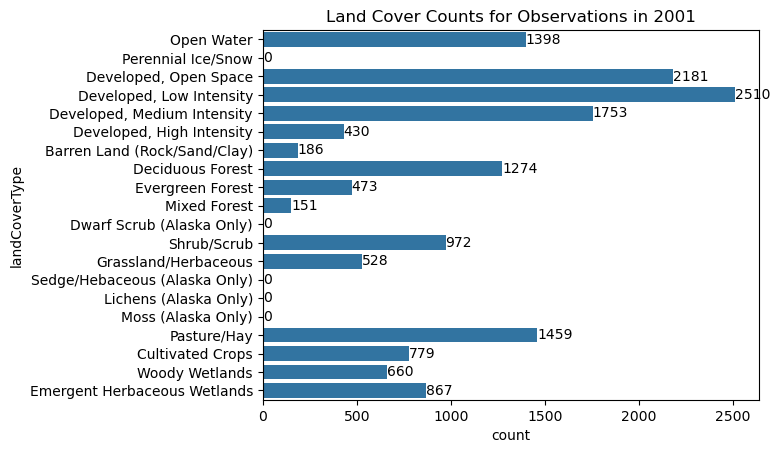

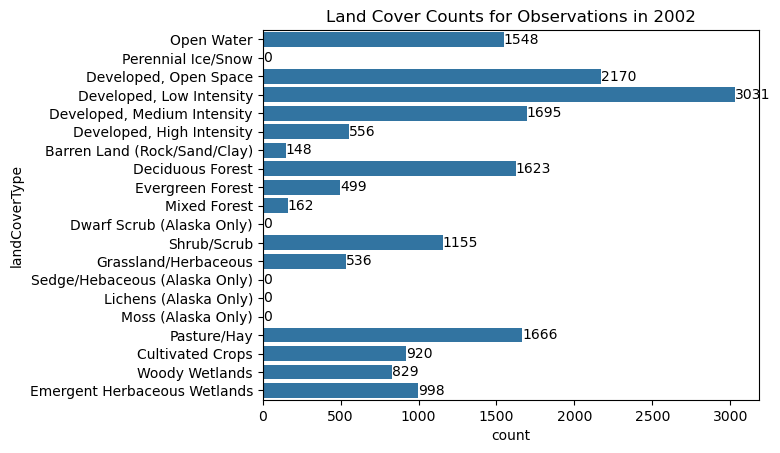

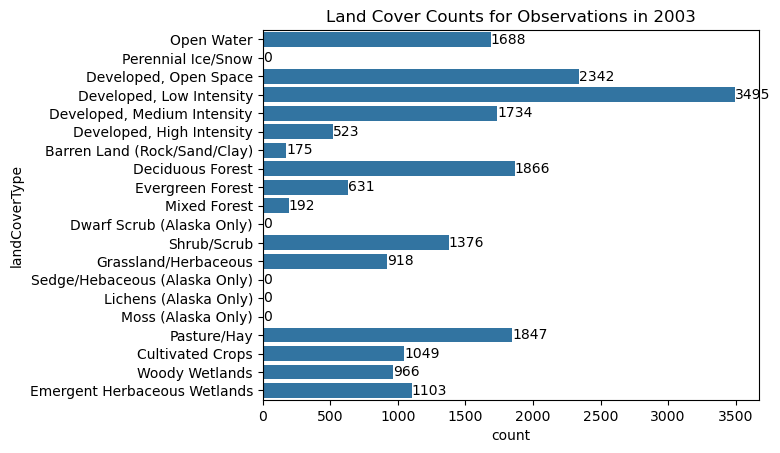

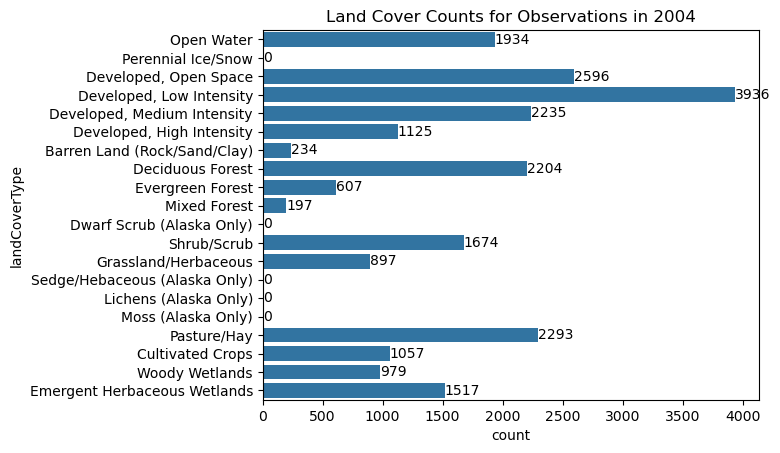

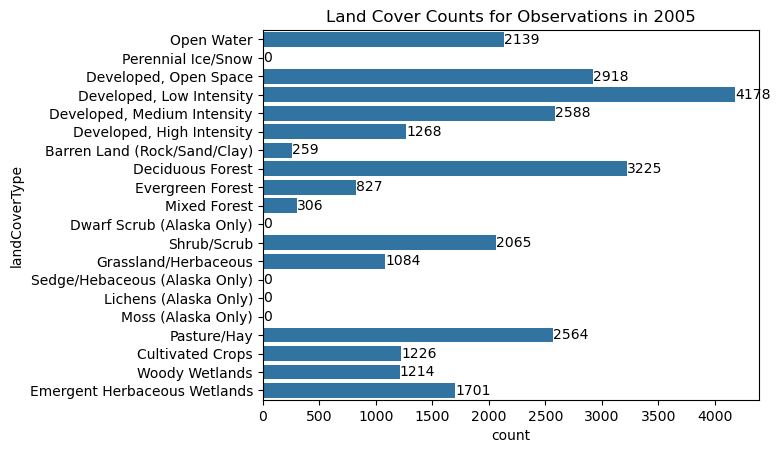

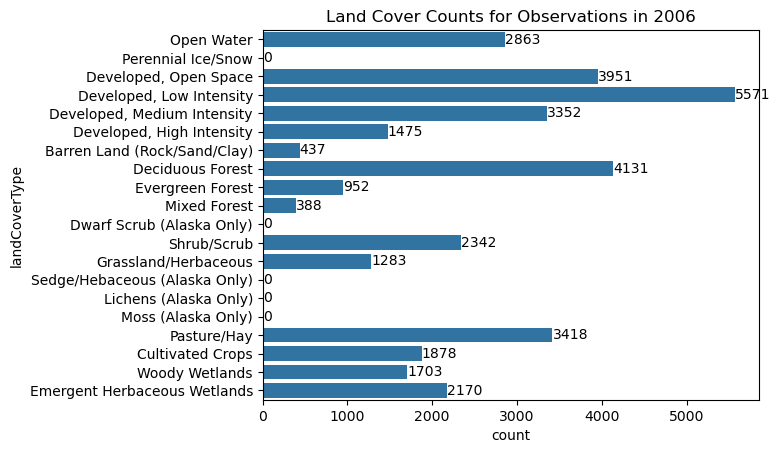

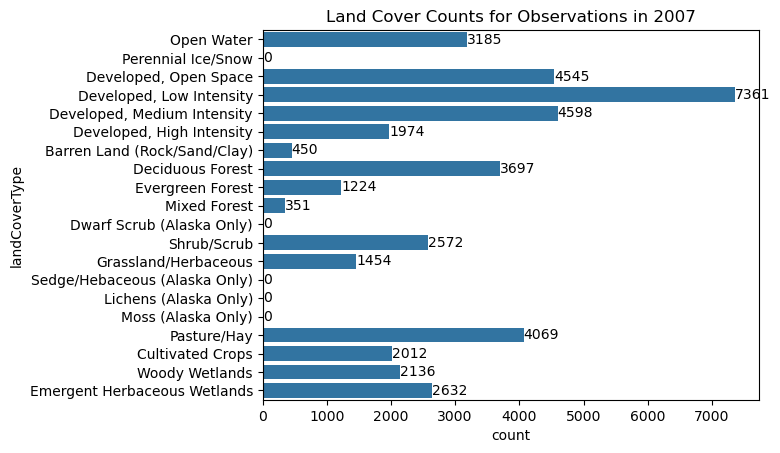

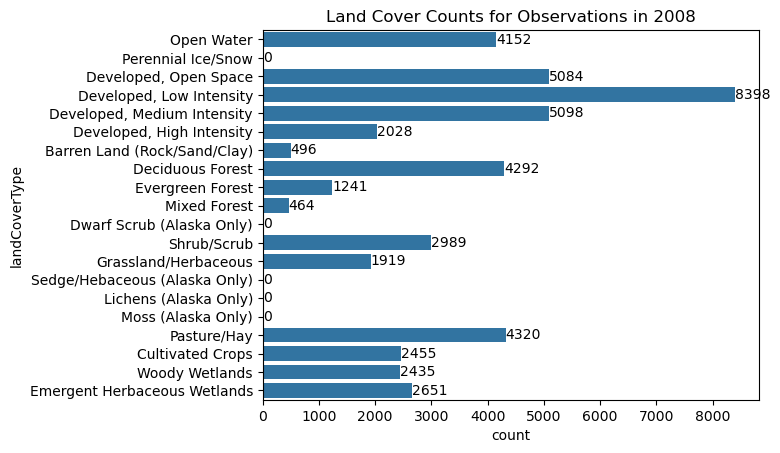

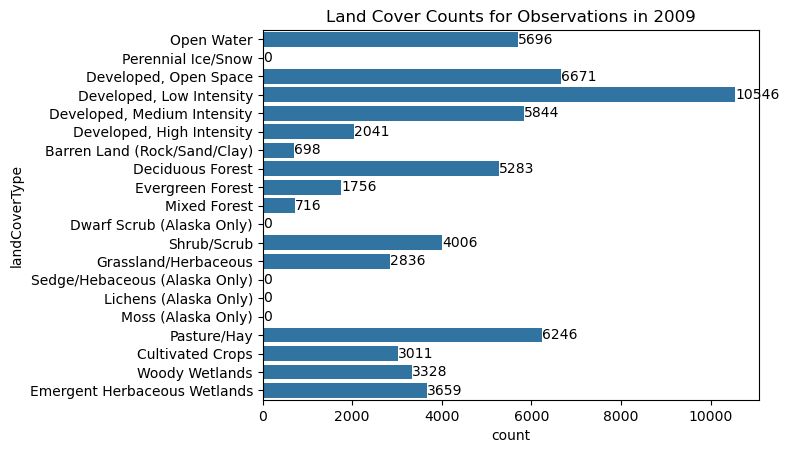

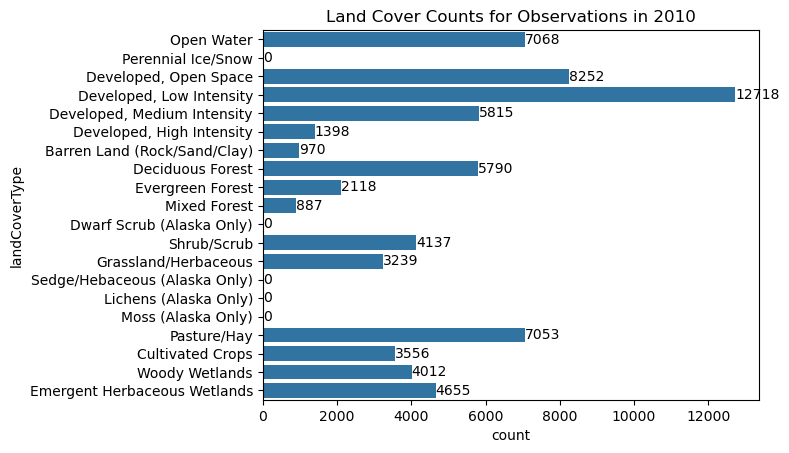

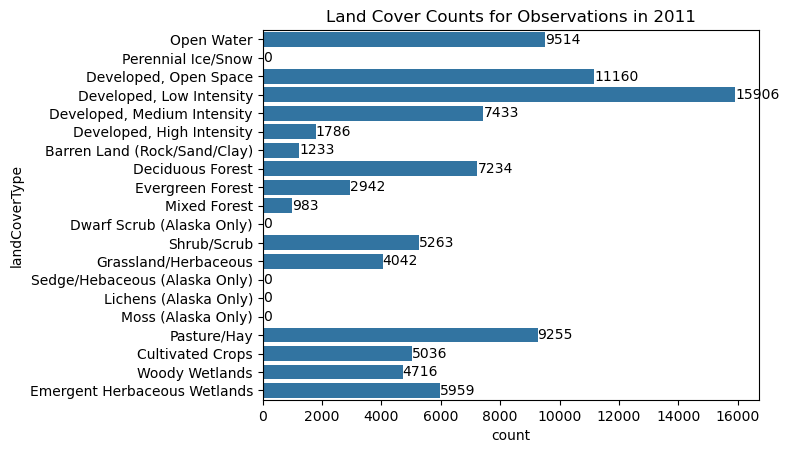

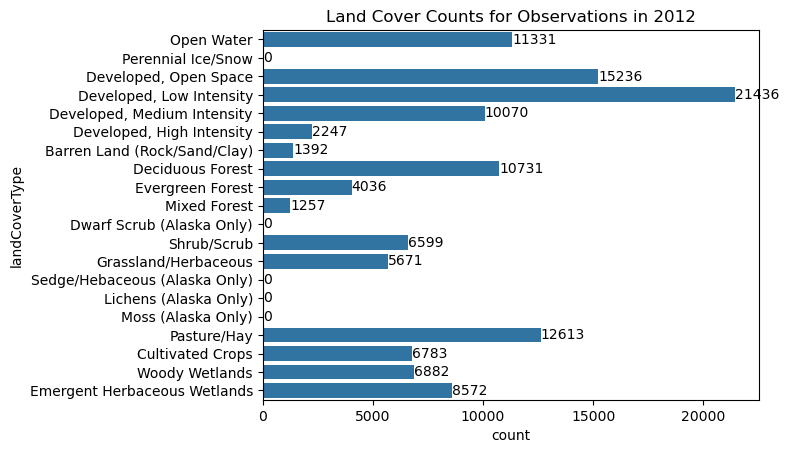

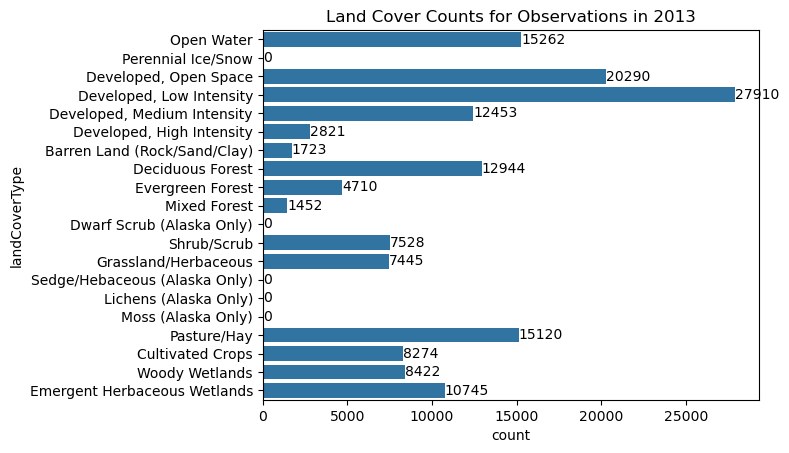

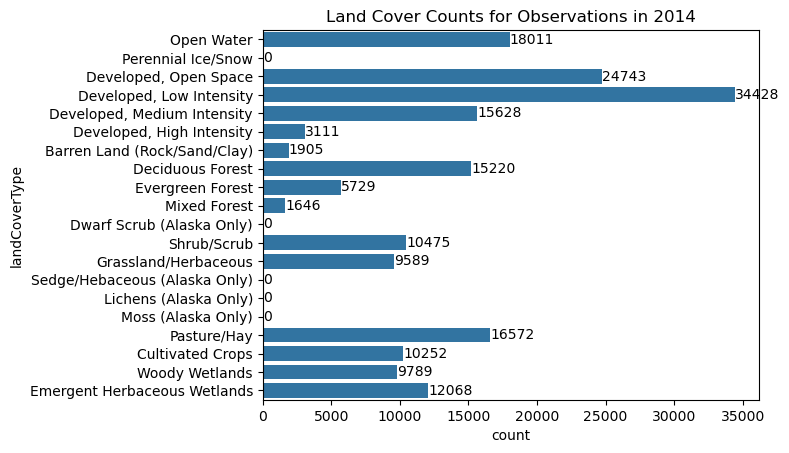

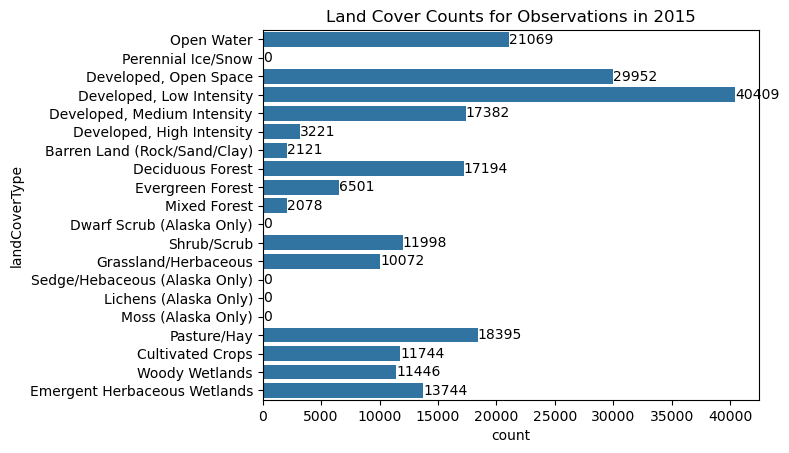

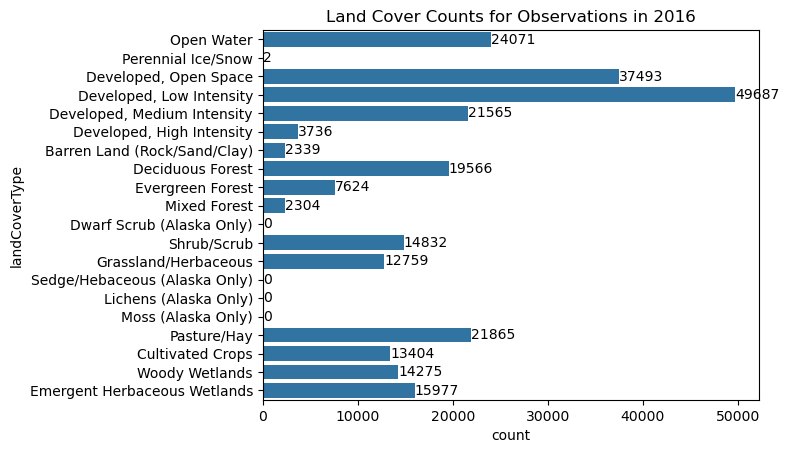

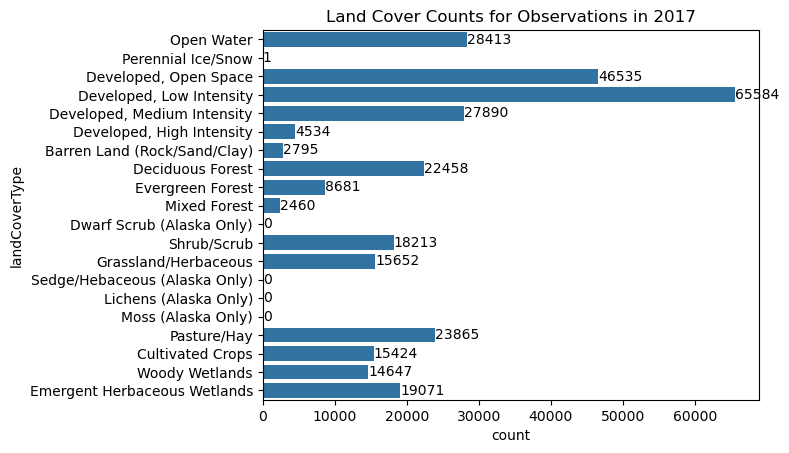

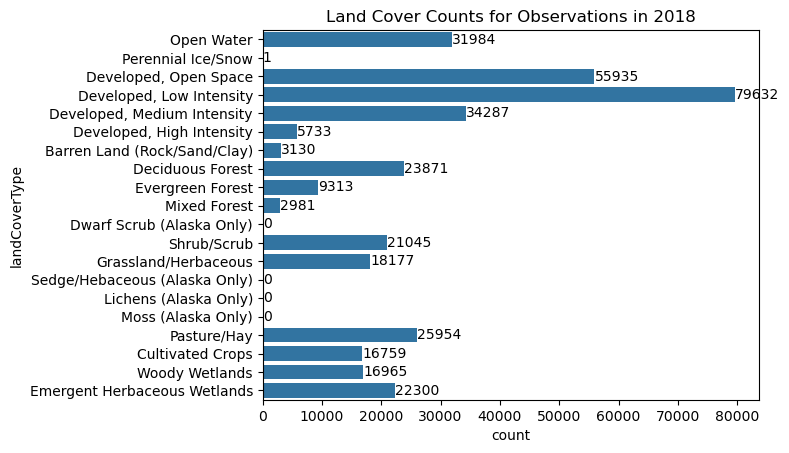

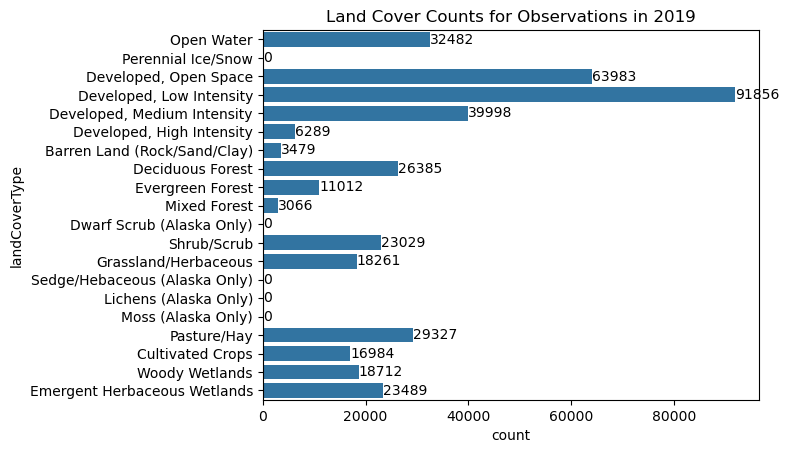

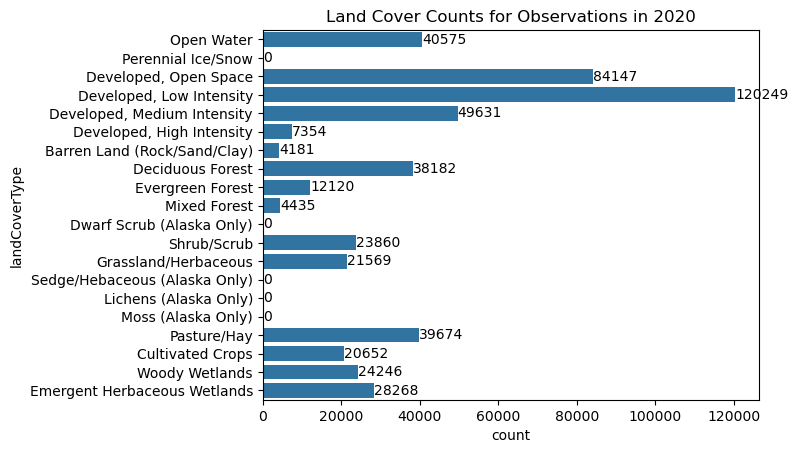

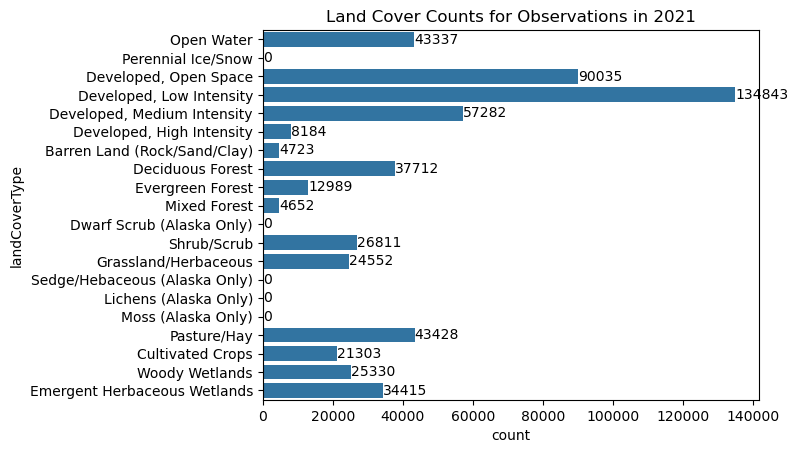

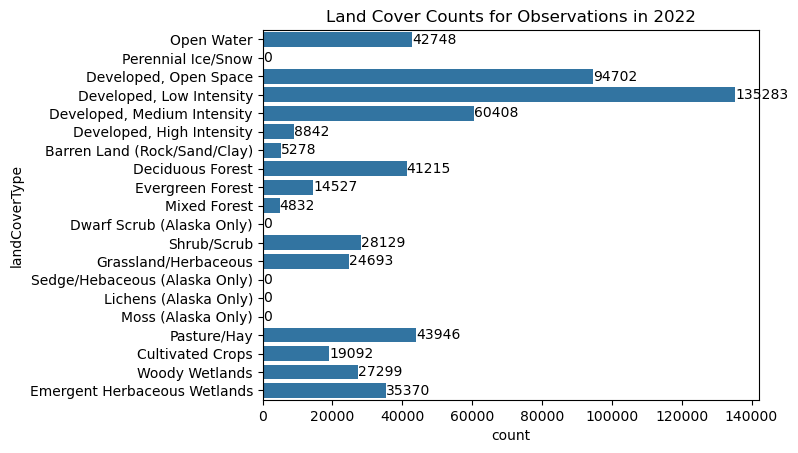

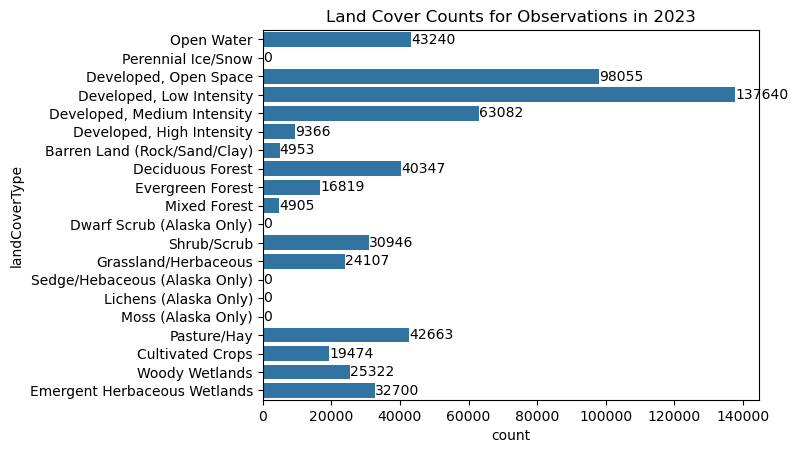

In [ ]:
# Plot count of occurences for each land cover type in each year
for year in years:
    year_df = relevant_species_df[relevant_species_df['observationYear'] == year]
    landcover_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])
    
    for band, value in landcover_types.items():
        count = len(year_df[year_df['landCoverBand'] == band])
        landcover_counts.loc[len(landcover_counts.index)] = [band, value, count]

    # Uncomment to delete rows where count is 0; not wise as doing so mucks up the continuity throughout the graphs
    #landcover_counts = landcover_counts.drop(landcover_counts[landcover_counts['count'] == 0].index)

    ax = sns.barplot(data=landcover_counts, y='landCoverType', x='count', orient='y')
    ax.set_title(f"Land Cover Counts for Observations in {year}")
    for col in ax.containers:
        ax.bar_label(col, fontsize=10)
    plt.show()

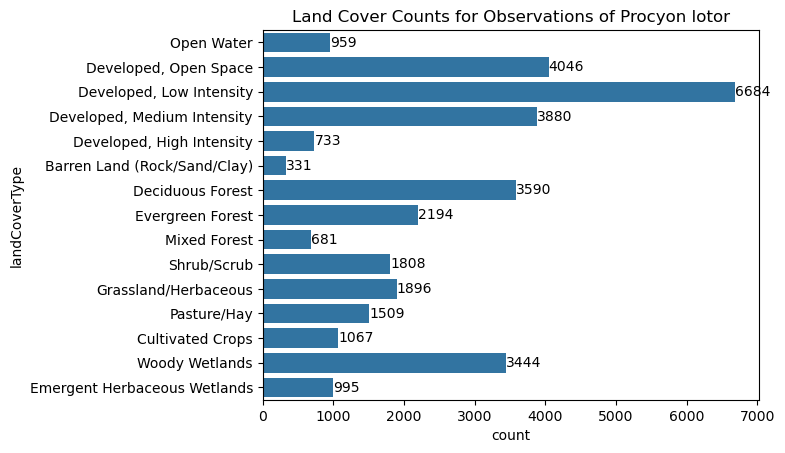

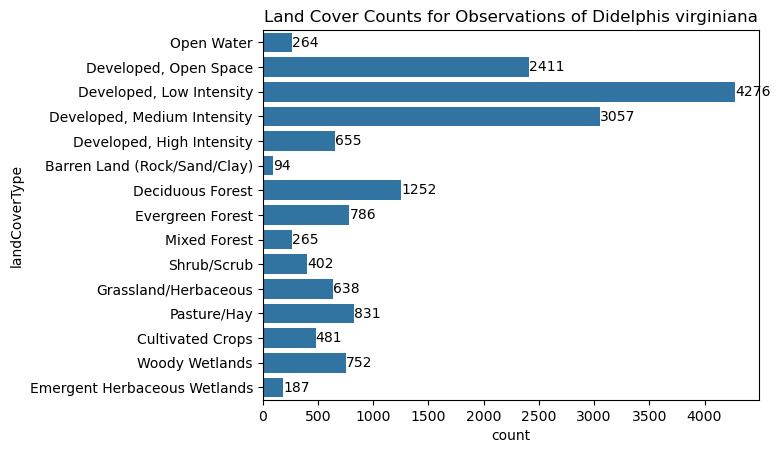

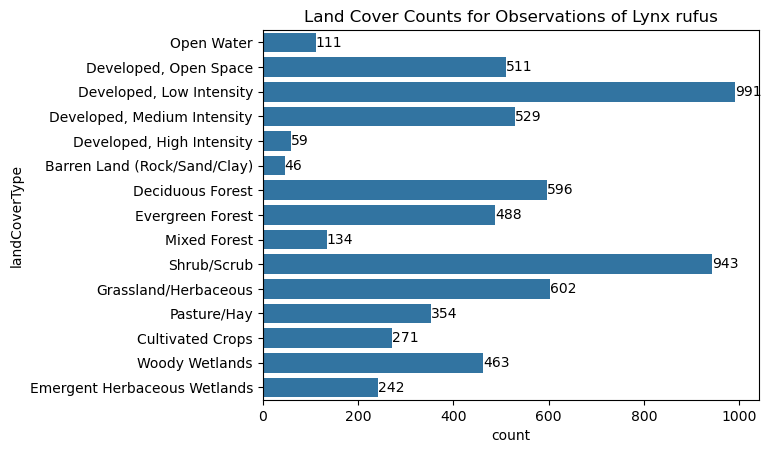

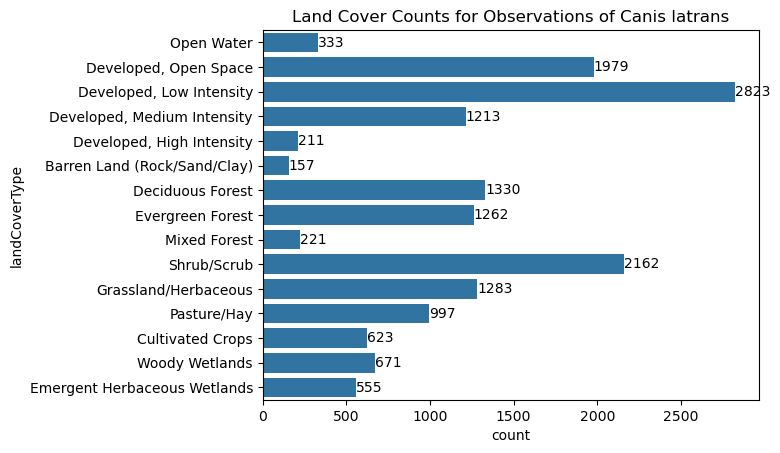

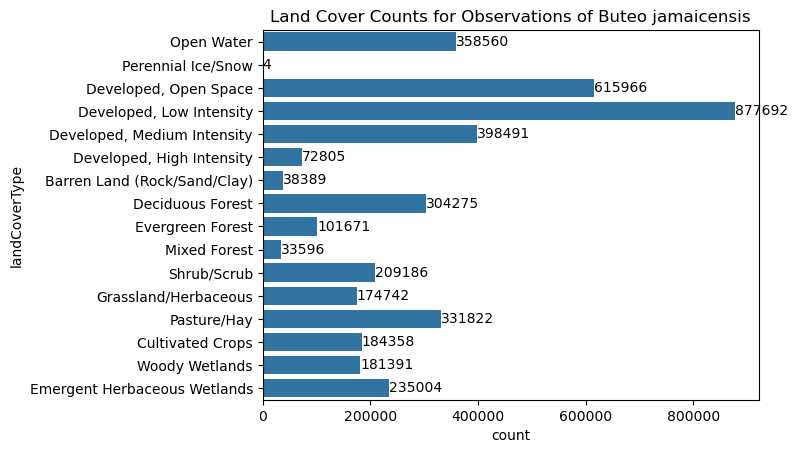

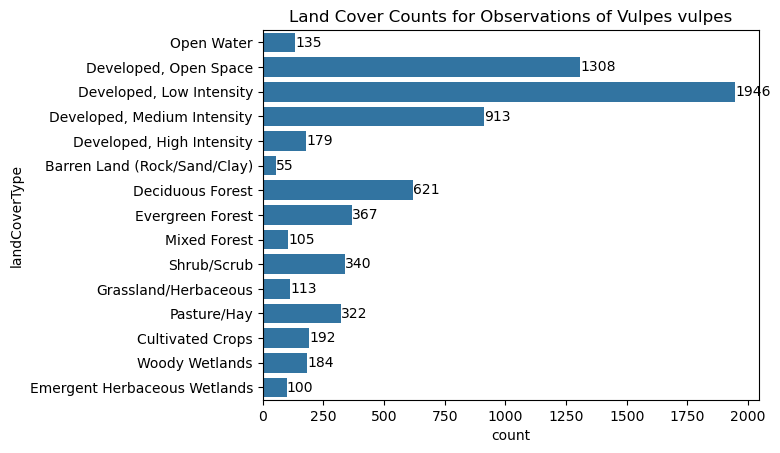

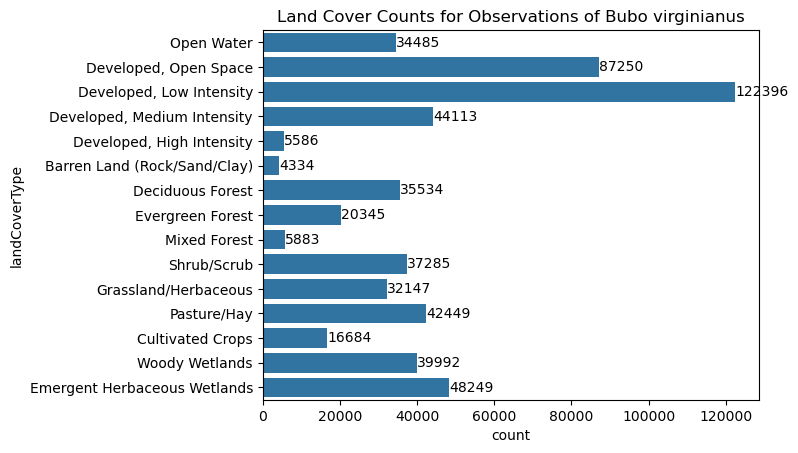

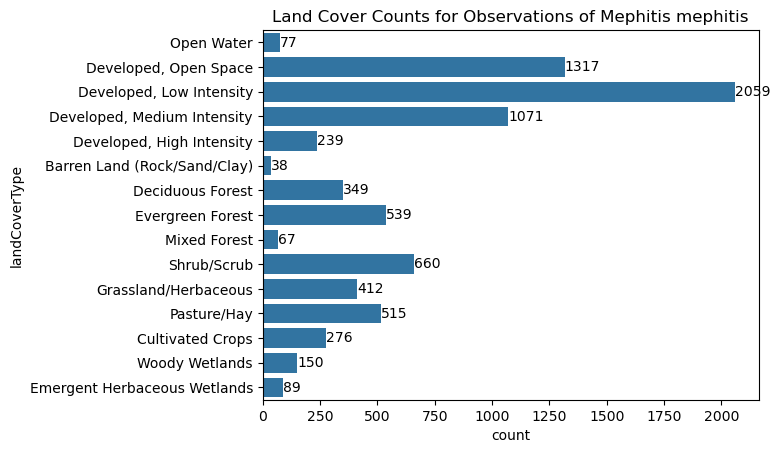

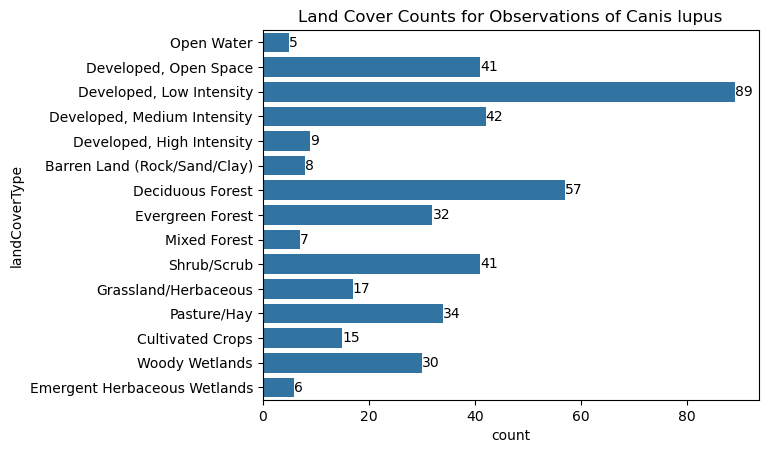

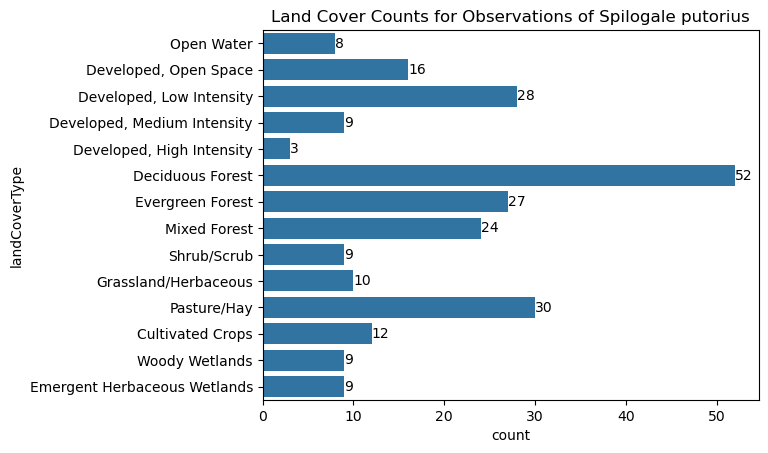

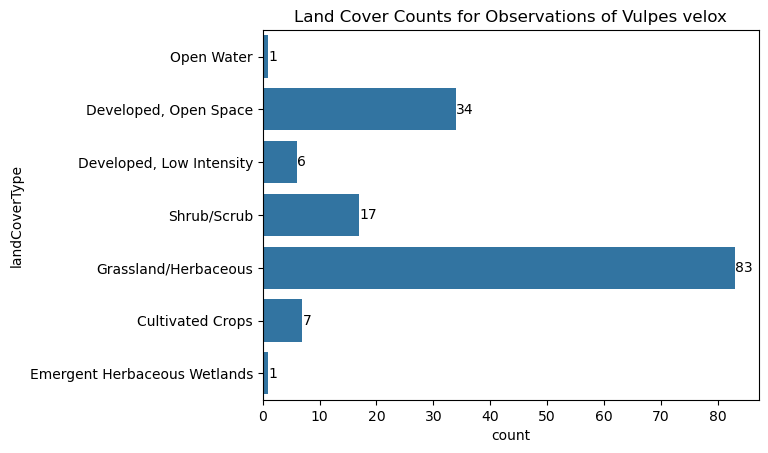

In [97]:
# Plot count of land cover occurence for each species
for critter in species:
    critter_df = relevant_species_df[relevant_species_df['species'] == critter]
    landcover_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])
    
    for band, value in landcover_types.items():
        count = len(critter_df[critter_df['landCoverBand'] == band])
        landcover_counts.loc[len(landcover_counts.index)] = [band, value, count]

    landcover_counts = landcover_counts.drop(landcover_counts[landcover_counts['count'] == 0].index)

    ax = sns.barplot(data=landcover_counts, y='landCoverType', x='count', orient='y')
    ax.set_title(f"Land Cover Counts for Observations of {critter}")
    for col in ax.containers:
        ax.bar_label(col, fontsize=10)
    plt.show()

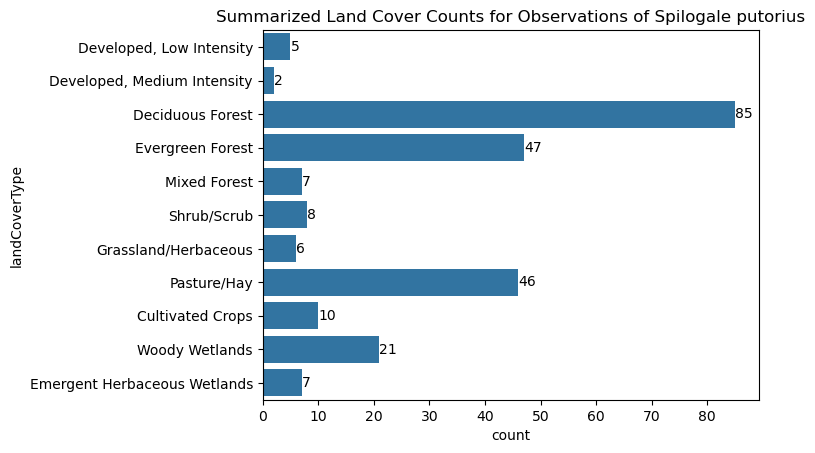

In [ ]:
# Do something special for the spotted skunks
# Since we have coordinate uncertainty, we should construct a square around the skunk coordinates and find the most common land cover type
#
# Coordinate uncertainty is usually around 30km
# According to iNaturalist, the uncertainty polygon is a 0.2 degree difference for latitude and longitude

from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import box
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas as gpd
import json
import random
import os

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

for year, raster in rasters.items():
    land_cover = rasterio.open(raster)
    
    transformer = Transformer.from_crs('epsg:4326', land_cover.crs)

    critter_df = relevant_species_df
    
    # Calculate plot data for spotted skunk
    spotted_skunks = critter_df[(critter_df['species'] == 'Spilogale putorius') & (critter_df['observationYear'] == year)].apply(lambda x: [x['gbifID'], x['decimalLatitude'], x['decimalLongitude']], axis=1)

    landcover_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])
    
    for gbif_id, lat, long in spotted_skunks:
        minx, maxy = transformer.transform(lat, long)
        maxx, miny = transformer.transform(lat + 0.2, long - 0.2)

        bbox = box(minx, miny, maxx, maxy)
        
        geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
    
        geo.to_crs(crs=land_cover.crs.data)
    
        coords = getFeatures(geo)
    
        out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)

        #rasterio.plot.show(out_img)

        landcover_amounts = {}
        
        for row in out_img[0]:
            uniques = np.unique(row, return_counts=True)

            totals = dict(zip(*uniques))

            for key, value in totals.items():
                count = landcover_amounts.get(key)

                if count:
                    landcover_amounts[key] = count + value
                else:
                    landcover_amounts[key] = value

        # Find most common landcover value
        maximum = 0
        landcover_band = ''
        for key, value in landcover_amounts.items():
            if key == 11:
                continue
            
            if value >= maximum:
                maximum = value
                landcover_band = key

        critter_df.loc[critter_df['gbifID'] == gbif_id, 'landCoverBand'] = landcover_band

for band, value in landcover_types.items():
    count = len(critter_df[(critter_df['landCoverBand'] == band) & (critter_df['species'] == 'Spilogale putorius')])
    landcover_counts.loc[len(landcover_counts.index)] = [band, value, count]

landcover_counts = landcover_counts.drop(landcover_counts[landcover_counts['count'] == 0].index)

ax = sns.barplot(data=landcover_counts, y='landCoverType', x='count', orient='y')
ax.set_title(f"Summarized Land Cover Counts for Observations of Spilogale putorius")
for col in ax.containers:
    ax.bar_label(col, fontsize=10)
plt.show()

## Aggregate Data and Form Blocks

In [ ]:
# Using the NLCD legend, create the following groupings:
#    Wetland (11, 12, 90, 95) -> 1
#    Agriculture (81, 82) -> 2
#    Developed (21, 22, 23, 24) -> 3
#    Forest (41, 42, 43) -> 4
#    Shrub (51, 52) -> 5
#    Grassland (71, 72, 73, 74) -> 6
aggregate_landcovers = {
    1: 'Wetland',
    2: 'Agriculture',
    3: 'Developed',
    4: 'Forest',
    5: 'Shrub',
    6: 'Grassland',
}

def aggregate_habitats(band):
    if band in [11, 12, 90, 95]:
        return 1
    elif band in [81, 82]:
        return 2
    elif band in [21, 22, 23, 24]:
        return 3
    elif band in [41, 42, 43]:
        return 4
    elif band in [51, 52]:
        return 5
    elif band in [71, 72, 73, 74]:
        return 6
    else:
        return 0

aggregate_df = relevant_species_df.copy()

# Aggregate Habitats
aggregate_df['landCoverBand'] = aggregate_df['landCoverBand'].apply(lambda x: aggregate_habitats(x))
aggregate_df

gbifID                                informationWithheld  \
0         3859129363                                                NaN   
1         3860455212                                                NaN   
9         4075722205                                                NaN   
12        4126873027  Coordinate uncertainty increased to 28592m at ...   
20        1640120276                                                NaN   
...              ...                                                ...   
10791047   920819632                                                NaN   
10791048   932726079                                                NaN   
10791049  2329536302                                                NaN   
10791050  4175275077                                                NaN   
10791051   920790353                                                NaN   

                    eventDate       eventTime       dateIdentified  \
0            2022-05-17T10:42  10:42:00-04:00  2022-05-27T19:54:02   
1            2022-04-20T19:16  19:16:00-04:00  2022-06-10T20:43:54   
9         2023-03-23T10:01:17  10:01:17-05:00  2023-03-23T16:28:04   
12        2023-05-26T19:51:41  19:51:41-05:00  2023-05-27T00:58:51   
20           2017-09-10T15:01  15:01:00-05:00  2017-09-11T14:19:10   
...                       ...             ...                  ...   
10791047     2012-02-23T00:00             NaN                  NaN   
10791048     2012-05-05T00:00             NaN                  NaN   
10791049     2013-06-15T00:00             NaN                  NaN   
10791050     2022-08-15T00:00             NaN                  NaN   
10791051     2012-04-29T00:00             NaN                  NaN   

         decimalLatitude  decimalLongitude      genus               species  \
0               31.96043        -81.054090    Procyon         Procyon lotor   
1              41.626835        -83.189505    Procyon         Procyon lotor   
9              29.461256        -98.482069  Didelphis  Didelphis virginiana   
12             36.166388        -97.035878       Lynx            Lynx rufus   
20             29.989548        -97.167526      Canis         Canis latrans   
...                  ...               ...        ...                   ...   
10791047       28.262205        -96.819763      Buteo     Buteo jamaicensis   
10791048       40.657131        -79.701981      Buteo     Buteo jamaicensis   
10791049       41.582947        -79.978554    Procyon         Procyon lotor   
10791050       40.066151        -85.987129      Buteo     Buteo jamaicensis   
10791051       41.124821        -80.205513      Buteo     Buteo jamaicensis   

          observationYear  landCoverBand  
0                    2022              1  
1                    2022              1  
9                    2023              3  
12                   2023              6  
20                   2017              3  
...                   ...            ...  
10791047             2012              1  
10791048             2012              2  
10791049             2013              3  
10791050             2022              3  
10791051             2012              4  

[4782852 rows x 11 columns]

### Re-plot Landcover Data using Aggregated Dataframe

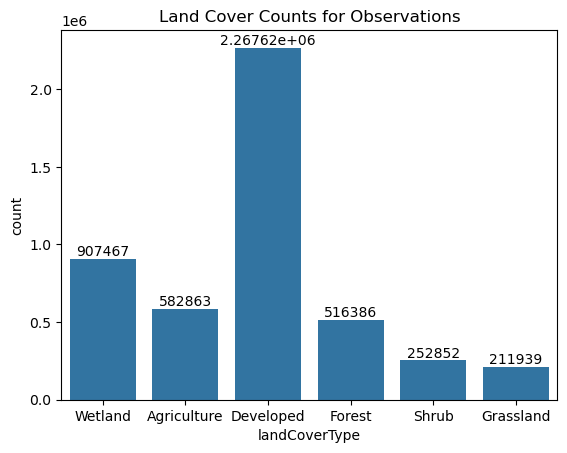

In [102]:
# Plot count of occurences for each land cover type
habitat_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])

for band, value in aggregate_landcovers.items():
    count = len(aggregate_df[aggregate_df['landCoverBand'] == band])
    habitat_counts.loc[len(habitat_counts.index)] = [band, value, count]

habitat_counts = habitat_counts.drop(habitat_counts[habitat_counts['count'] == 0].index)

ax = sns.barplot(data=habitat_counts, x='landCoverType', y='count', orient='x')
ax.set_title(f"Land Cover Counts for Observations")
for col in ax.containers:
    ax.bar_label(col, fontsize=10)
plt.show()

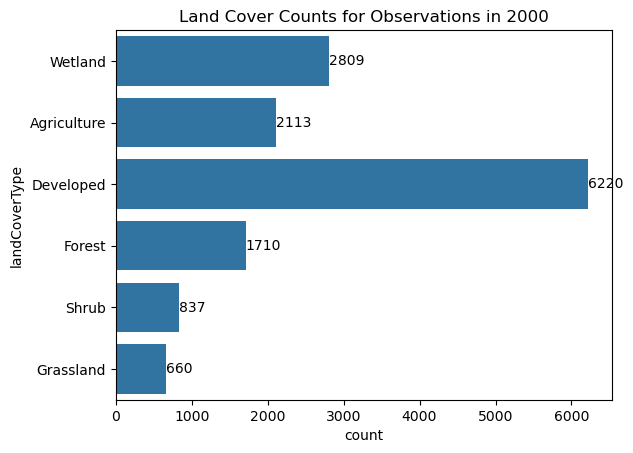

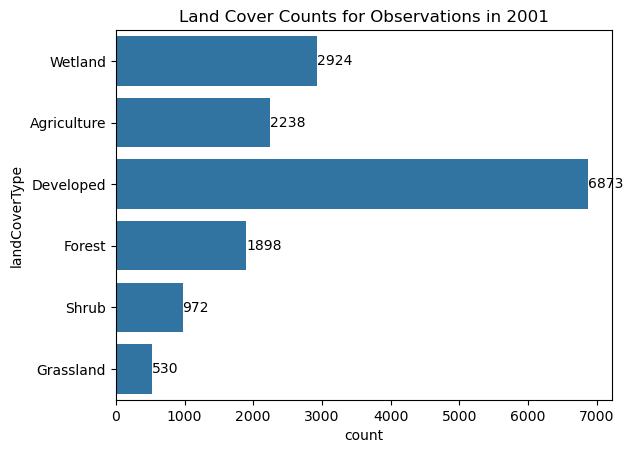

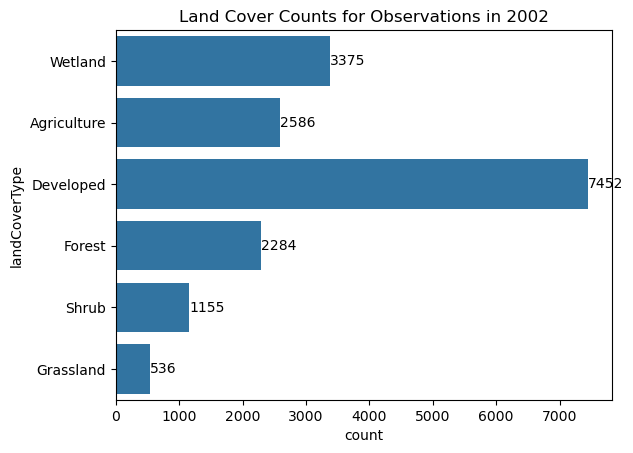

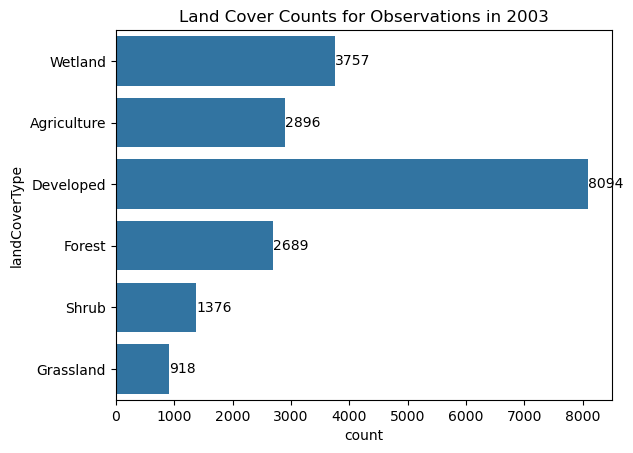

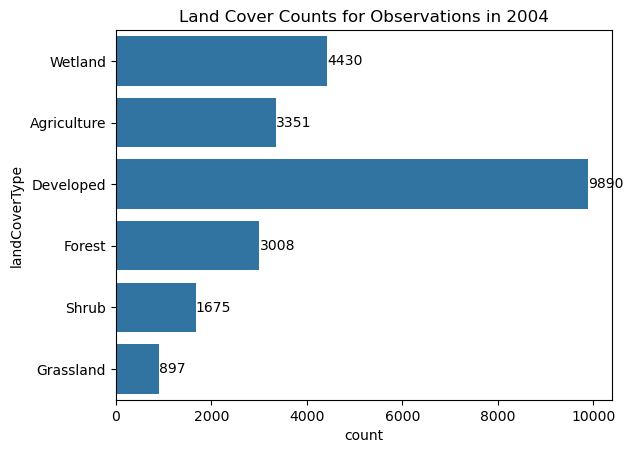

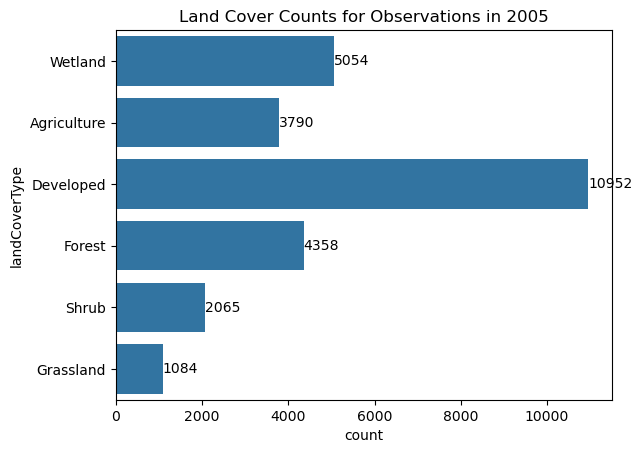

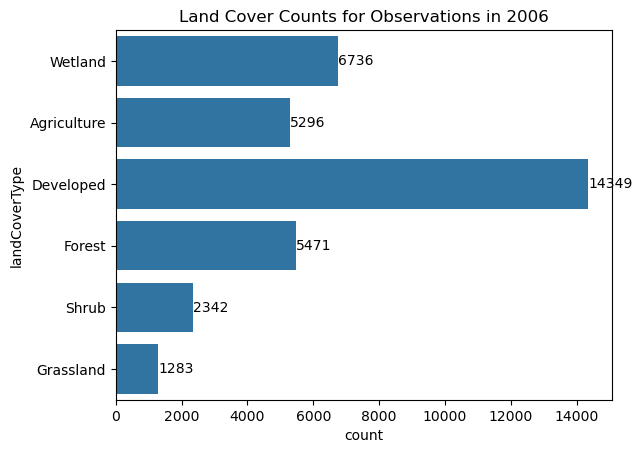

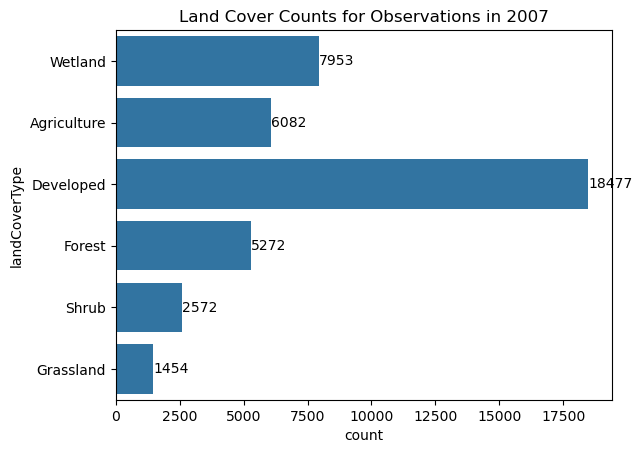

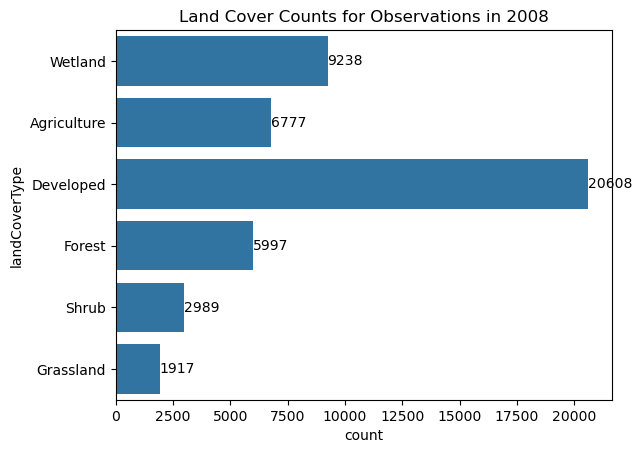

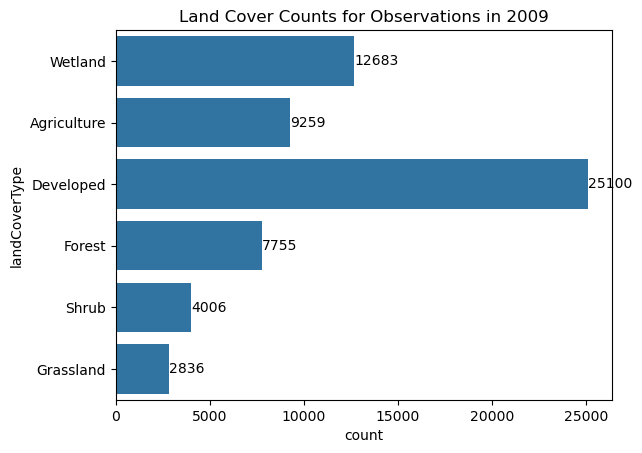

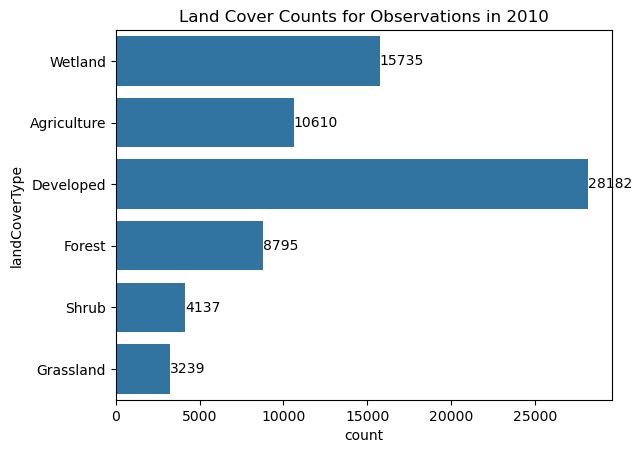

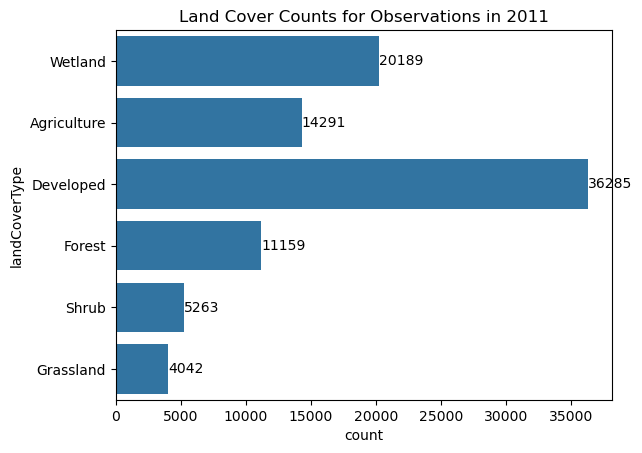

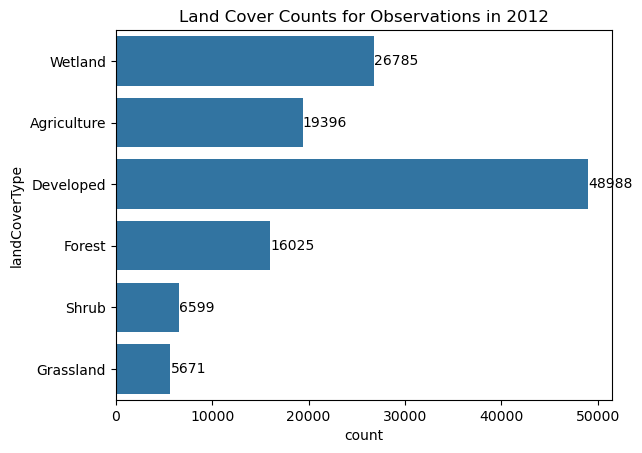

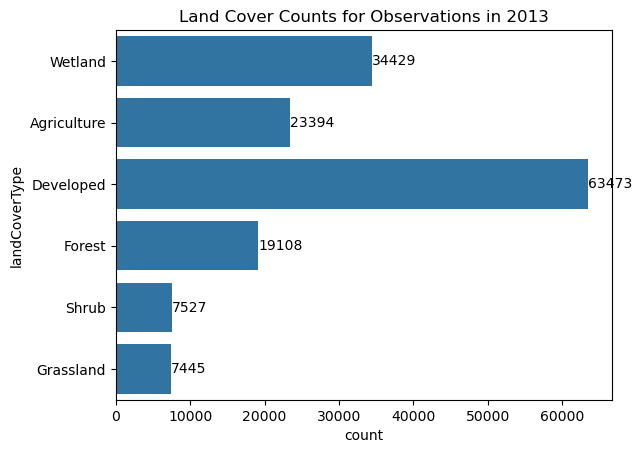

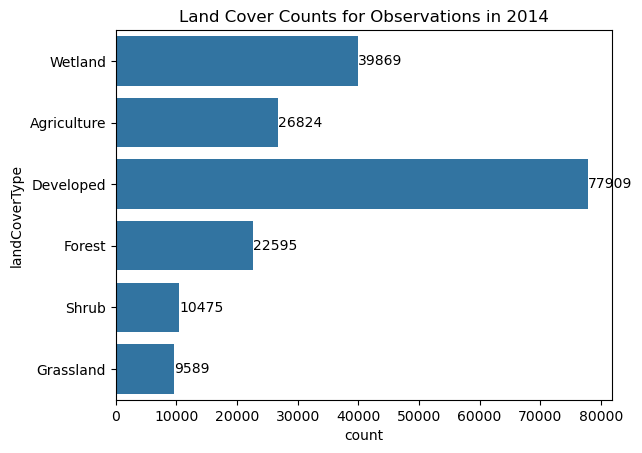

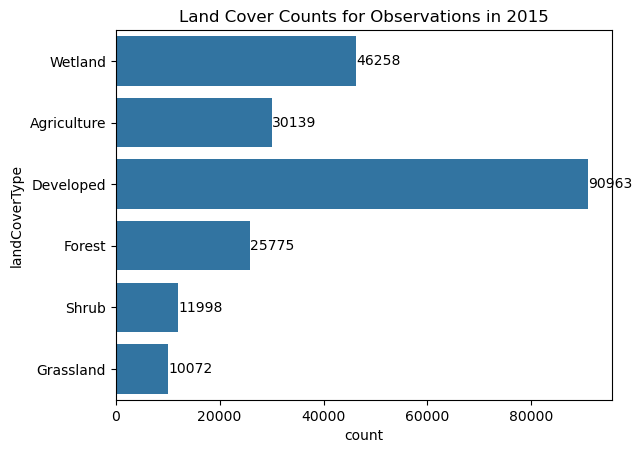

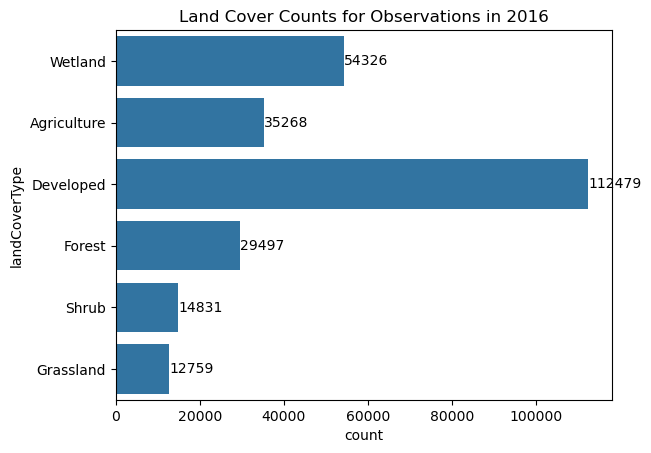

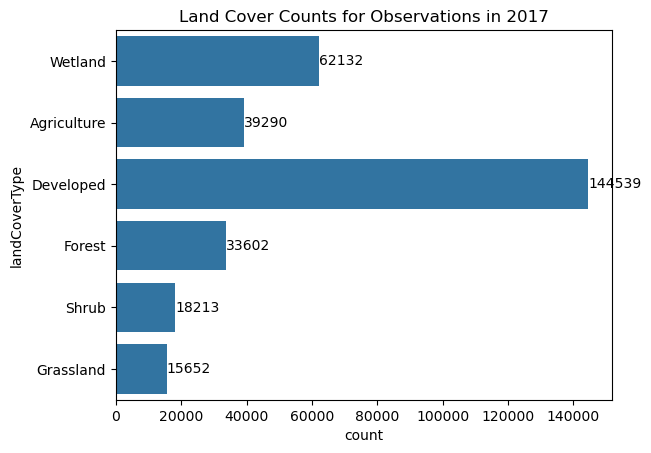

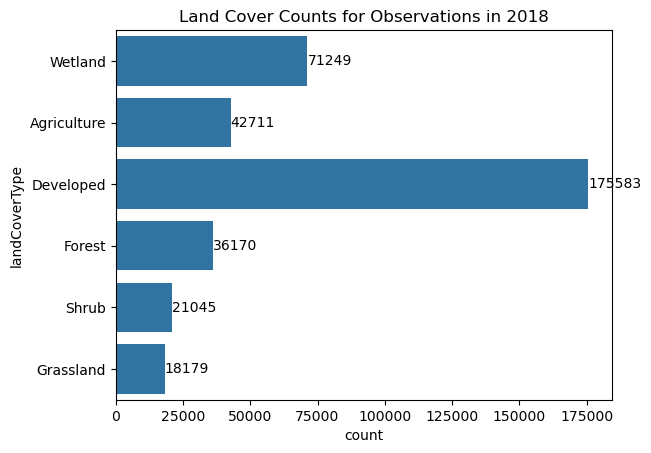

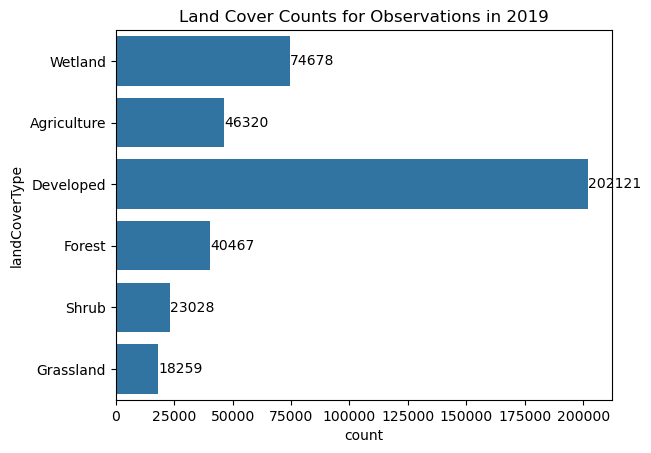

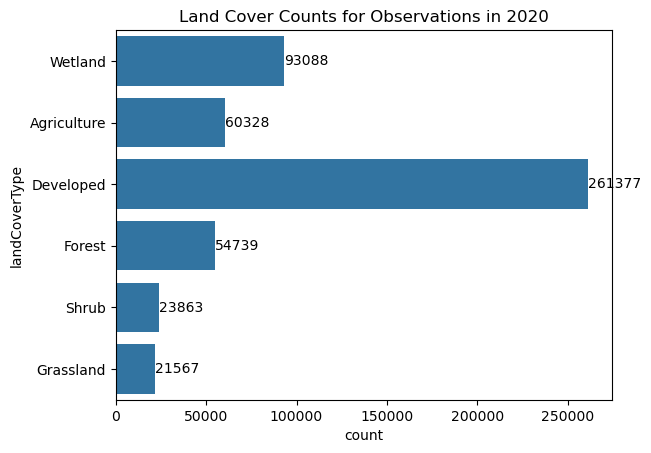

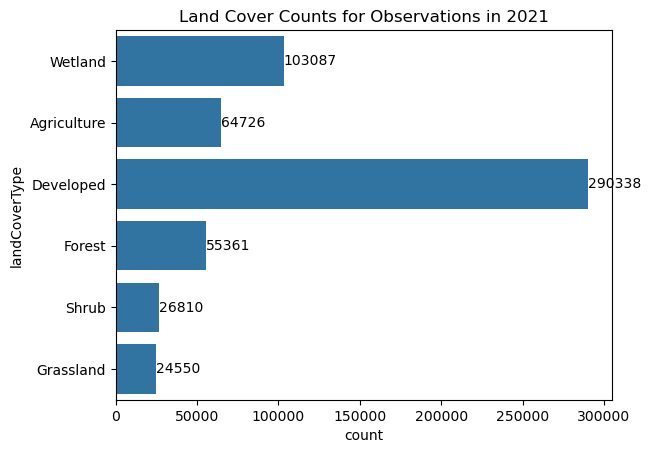

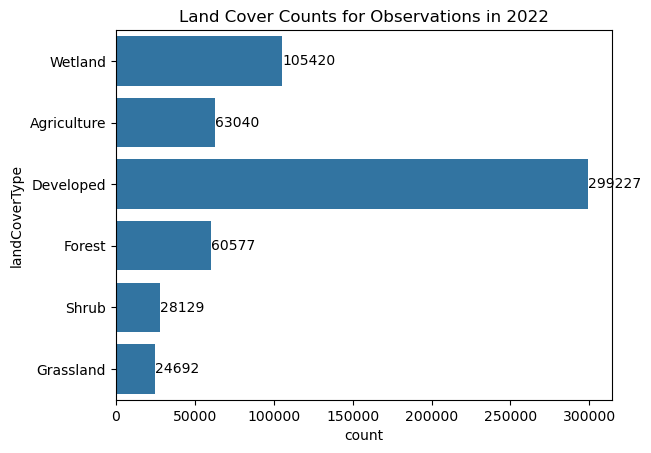

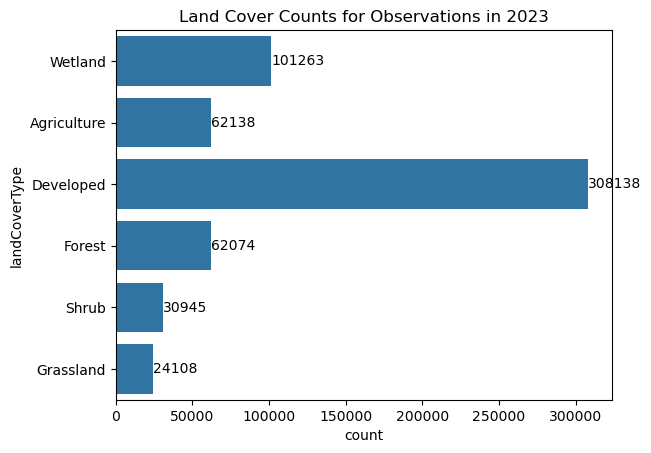

In [ ]:
# Plot count of occurences for each land cover type in each year
for year in years:
    year_df = aggregate_df[aggregate_df['observationYear'] == year]
    habitat_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])
    
    for band, value in aggregate_landcovers.items():
        count = len(year_df[year_df['landCoverBand'] == band])
        habitat_counts.loc[len(habitat_counts.index)] = [band, value, count]

    # Uncomment to delete rows where count is 0; not wise as doing so mucks up the continuity throughout the graphs
    #landcover_counts = landcover_counts.drop(landcover_counts[landcover_counts['count'] == 0].index)

    ax = sns.barplot(data=habitat_counts, y='landCoverType', x='count', orient='y')
    ax.set_title(f"Land Cover Counts for Observations in {year}")
    for col in ax.containers:
        ax.bar_label(col, fontsize=10)
    plt.show()

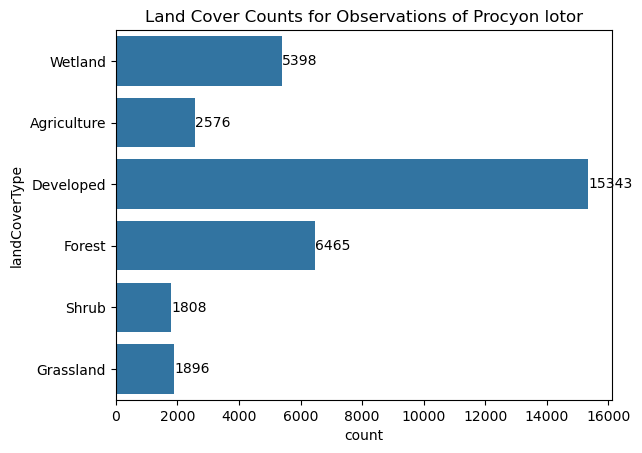

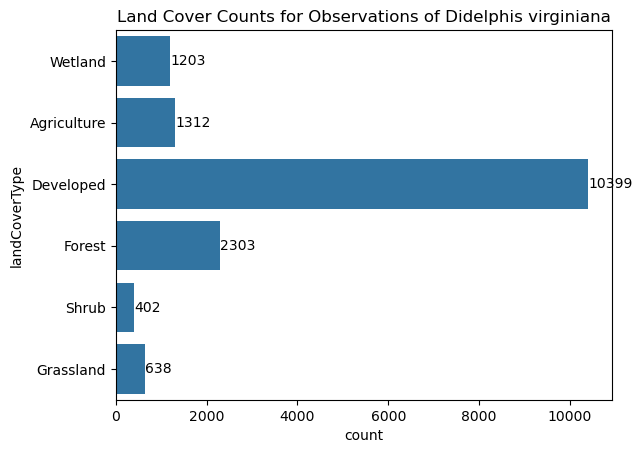

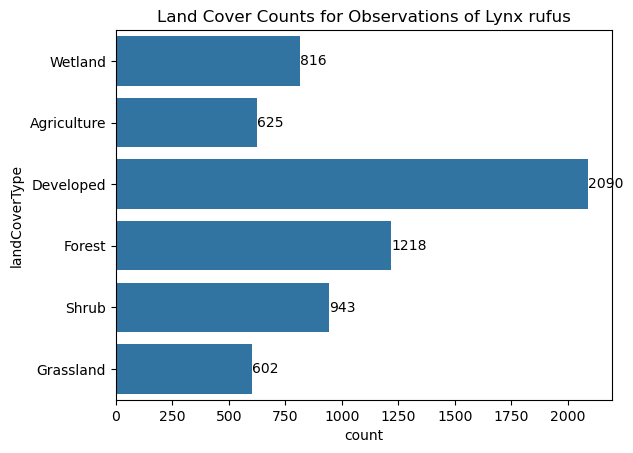

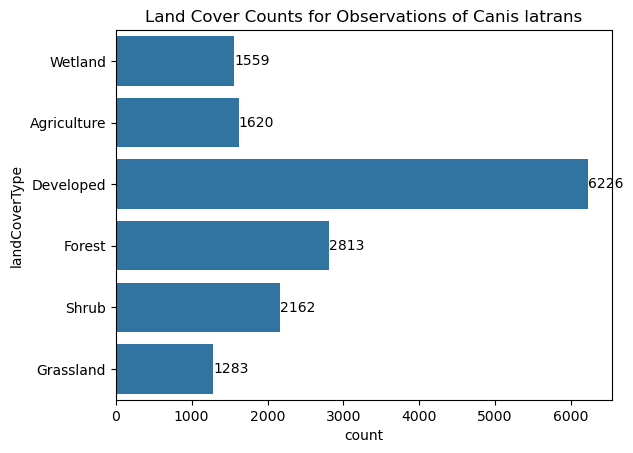

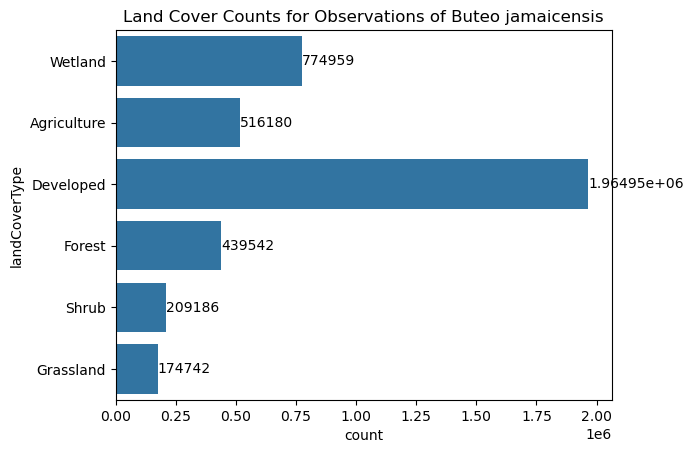

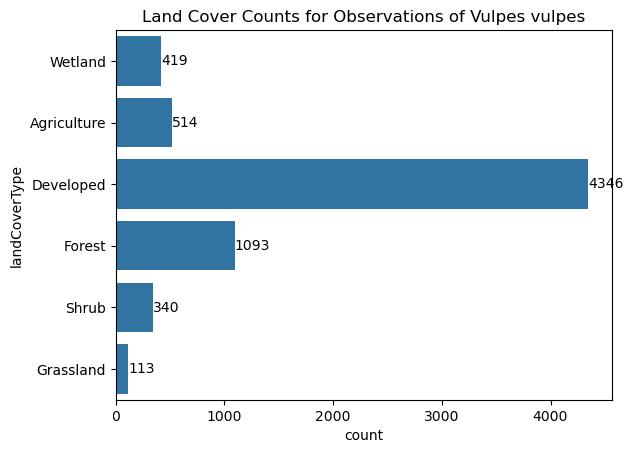

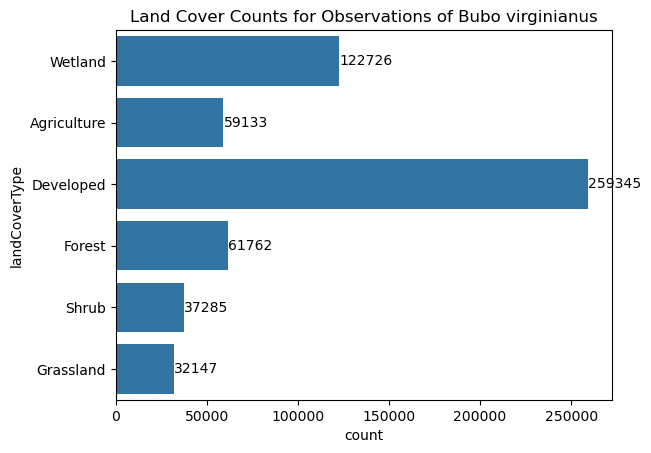

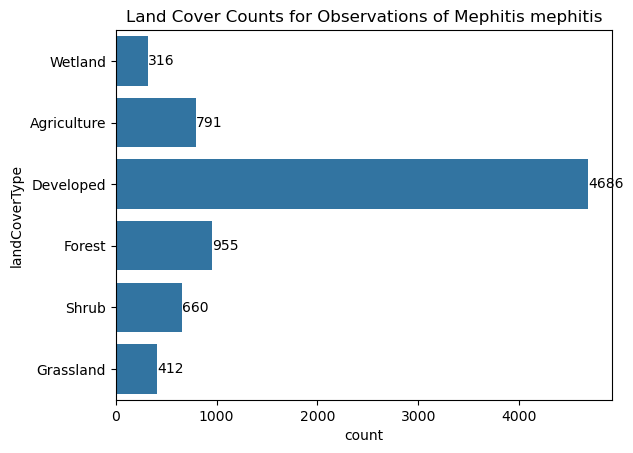

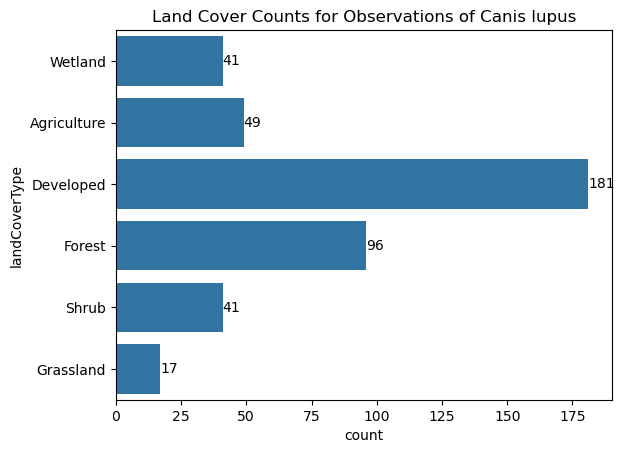

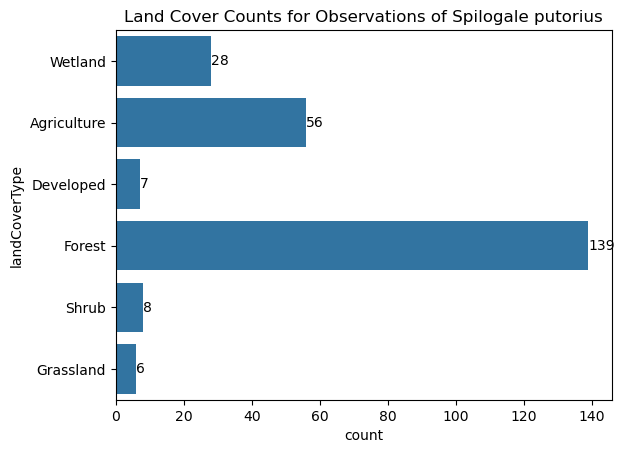

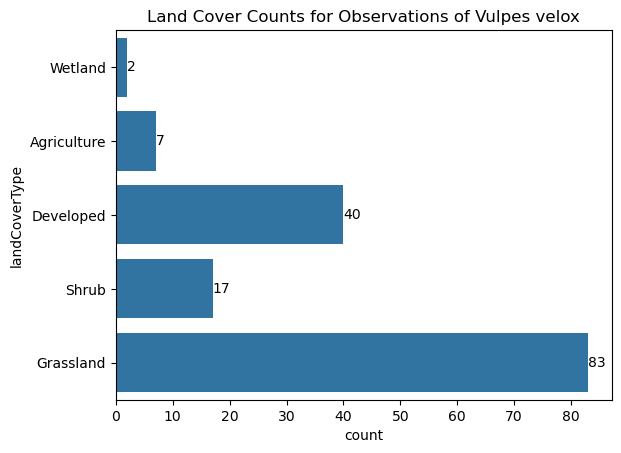

In [104]:
# Plot count of land cover occurence for each species
for critter in species:
    critter_df = aggregate_df[aggregate_df['species'] == critter]
    habitat_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])
    
    for band, value in aggregate_landcovers.items():
        count = len(critter_df[critter_df['landCoverBand'] == band])
        habitat_counts.loc[len(habitat_counts.index)] = [band, value, count]

    habitat_counts = habitat_counts.drop(habitat_counts[habitat_counts['count'] == 0].index)

    ax = sns.barplot(data=habitat_counts, y='landCoverType', x='count', orient='y')
    ax.set_title(f"Land Cover Counts for Observations of {critter}")
    for col in ax.containers:
        ax.bar_label(col, fontsize=10)
    plt.show()

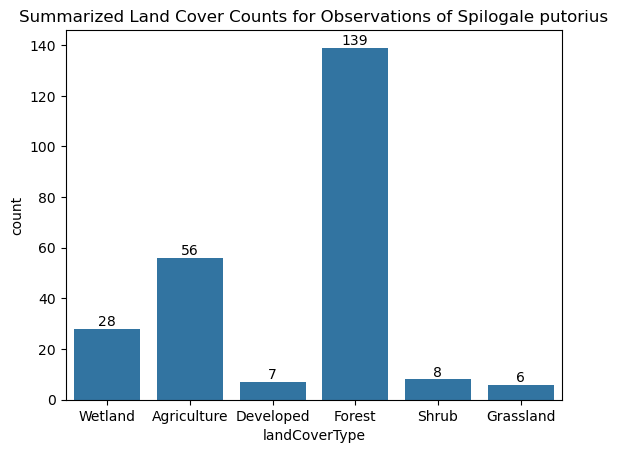

In [ ]:
# Do something special for the spotted skunks
# Since we have coordinate uncertainty, we should construct a square around the skunk coordinates and find the most common land cover type
#
# Coordinate uncertainty is usually around 30km
# According to iNaturalist, the uncertainty polygon is a 0.2 degree difference for latitude and longitude

temp_aggregate_df = relevant_species_df.copy()
landcover_counts = pd.DataFrame(columns = ['landCoverValue', 'landCoverType','count'])

for year, raster in rasters.items():
    land_cover = rasterio.open(raster)
    
    transformer = Transformer.from_crs('epsg:4326', land_cover.crs)
    
    # Calculate plot data for spotted skunk
    spotted_skunks = temp_aggregate_df[(temp_aggregate_df['species'] == 'Spilogale putorius') & (temp_aggregate_df['observationYear'] == year)].apply(lambda x: [x['gbifID'], x['decimalLatitude'], x['decimalLongitude']], axis=1)
    
    for gbif_id, lat, long in spotted_skunks:
        minx, maxy = transformer.transform(lat, long)
        maxx, miny = transformer.transform(lat + 0.2, long - 0.2)

        bbox = box(minx, miny, maxx, maxy)
        
        geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
    
        geo.to_crs(crs=land_cover.crs.data)
    
        coords = getFeatures(geo)
    
        out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)

        #rasterio.plot.show(out_img)

        landcover_amounts = {}
        
        for row in out_img[0]:
            uniques = np.unique(row, return_counts=True)

            totals = dict(zip(*uniques))

            for key, value in totals.items():
                #habitat_type = get_habitat_type(key)

                count = landcover_amounts.get(key)

                if count:
                    landcover_amounts[key] = count + value
                else:
                    landcover_amounts[key] = value


        # Find most common landcover value
        maximum = 0
        landcover_band = ''
        for key, value in landcover_amounts.items():
            if key == 11:
                continue
            
            if value >= maximum:
                maximum = value
                landcover_band = key

        temp_aggregate_df.loc[temp_aggregate_df['gbifID'] == gbif_id, 'landCoverBand'] = landcover_band

# Aggregate landcover data
temp_aggregate_df['landCoverBand'] = temp_aggregate_df['landCoverBand'].apply(lambda x: aggregate_habitats(x))

for band, value in aggregate_landcovers.items():
    count = len(temp_aggregate_df[(temp_aggregate_df['landCoverBand'] == band) & (temp_aggregate_df['species'] == 'Spilogale putorius')])
    landcover_counts.loc[len(landcover_counts.index)] = [band, value, count]

landcover_counts = landcover_counts.drop(landcover_counts[landcover_counts['count'] == 0].index)

ax = sns.barplot(data=landcover_counts, x='landCoverType', y='count')
ax.set_title(f"Summarized Land Cover Counts for Observations of Spilogale putorius")
for col in ax.containers:
    ax.bar_label(col, fontsize=10)
plt.show()

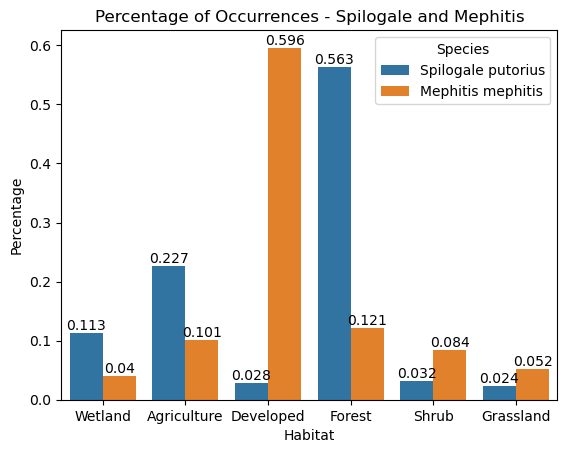

In [ ]:
# Combine Spilogale bar graph with Mephitis

import decimal

spilogale_count = len(aggregate_df[aggregate_df['species'] == 'Spilogale putorius'])
mephitis_count = len(aggregate_df[aggregate_df['species'] == 'Mephitis mephitis'])

columns = {
    'landCoverValue': [],
    'Habitat': [],
    'count': [],
    'Species': [],
    'Percentage': []
}

for species in ['Spilogale putorius', 'Mephitis mephitis']:
    for landcover_val in [1, 2, 3, 4, 5, 6]:
        count = len(aggregate_df[(aggregate_df['species'] == species) & (aggregate_df['landCoverBand'] == landcover_val)])
        if species == 'Spilogale putorius':
            percentage = count / spilogale_count
        elif species == 'Mephitis mephitis':
            percentage = count / mephitis_count
        else:
            percentage = None
        
        columns['landCoverValue'].append(landcover_val)
        columns['Habitat'].append(aggregate_landcovers[landcover_val])
        columns['count'].append(count)
        columns['Species'].append(species)
        columns['Percentage'].append(round(percentage,3))
        

habitat_counts_df = pd.DataFrame(data=columns)

ax = sns.barplot(data=habitat_counts_df, x='Habitat', y='Percentage', hue='Species')
ax.set_title(f"Percentage of Occurrences - Spilogale and Mephitis")
for col in ax.containers:
    ax.bar_label(col, fontsize=10)
plt.show()

### Construct Bounding Boxes

In [35]:
aggregate_df[aggregate_df['species'] == 'Spilogale putorius']['informationWithheld'].unique()

array(['Coordinate uncertainty increased to 61405m to protect threatened taxon',
       'Coordinate uncertainty increased to 29356m at the request of the observer',
       'Coordinate uncertainty increased to 29066m at the request of the observer',
       'Coordinate uncertainty increased to 28790m at the request of the observer',
       'Coordinate uncertainty increased to 28762m at the request of the observer',
       'Coordinate uncertainty increased to 29868m to protect threatened taxon',
       'Coordinate uncertainty increased to 29680m to protect threatened taxon',
       'Coordinate uncertainty increased to 29252m to protect threatened taxon',
       'Coordinate uncertainty increased to 28649m at the request of the observer',
       'Coordinate uncertainty increased to 28649m to protect threatened taxon',
       'Coordinate uncertainty increased to 29798m to protect threatened taxon',
       'Coordinate uncertainty increased to 28592m to protect threatened taxon',
       'Coord

PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-288021.7652922664, 539594.0247655495], [-288021.7652922664, 549594.0247655495], [-298021.7652922664, 549594.0247655495], [-298021.7652922664, 539594.0247655495], [-288021.7652922664, 539594.0247655495]]

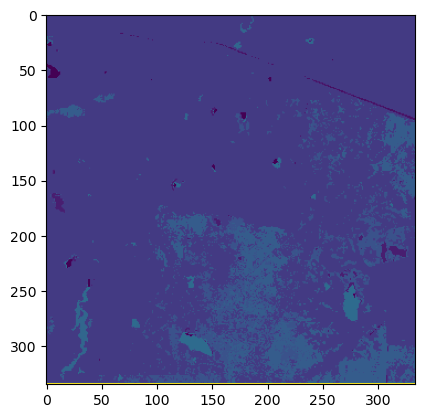

(1, 335, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-1587539.3404471143, 1638226.1558247525], [-1587539.3404471143, 1648226.1558247525], [-1597539.3404471143, 1648226.1558247525], [-1597539.3404471143, 1638226.1558247525], [-1587539.34044711

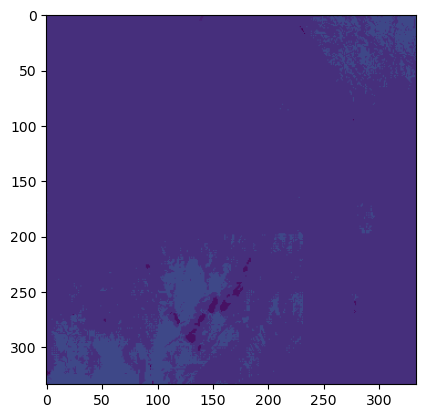

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-852758.6465920119, 326394.28647117864], [-852758.6465920119, 336394.28647117864], [-862758.6465920119, 336394.28647117864], [-862758.6465920119, 326394.28647117864], [-852758.6465920119, 3

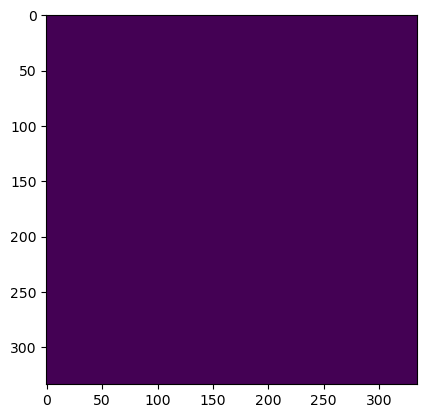

(1, 334, 335)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-1512831.8998648496, 867642.0236218758], [-1512831.8998648496, 877642.0236218758], [-1522831.8998648496, 877642.0236218758], [-1522831.8998648496, 867642.0236218758], [-1512831.8998648496, 

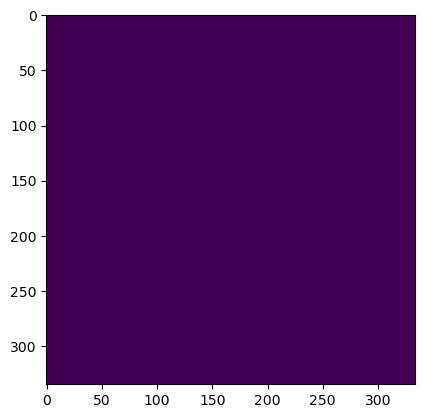

(1, 335, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[291151.4428772754, 3107172.44198352], [291151.4428772754, 3117172.44198352], [281151.4428772754, 3117172.44198352], [281151.4428772754, 3107172.44198352], [291151.4428772754, 3107172.441983

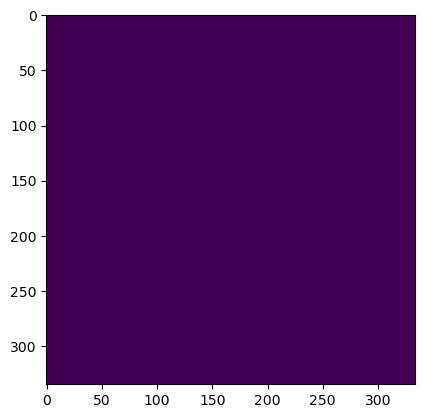

(1, 335, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[473624.8621548498, 1857352.0152550177], [473624.8621548498, 1867352.0152550177], [463624.8621548498, 1867352.0152550177], [463624.8621548498, 1857352.0152550177], [473624.8621548498, 185735

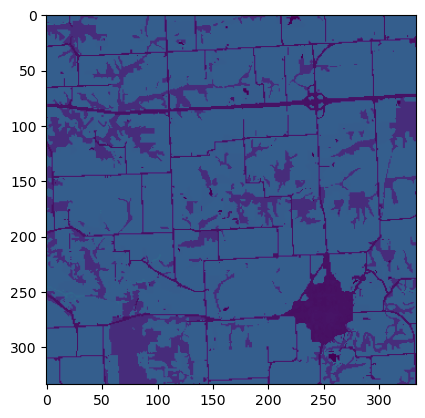

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-2306918.2522657113, 785689.4028277183], [-2306918.2522657113, 795689.4028277183], [-2316918.2522657113, 795689.4028277183], [-2316918.2522657113, 785689.4028277183], [-2306918.2522657113, 

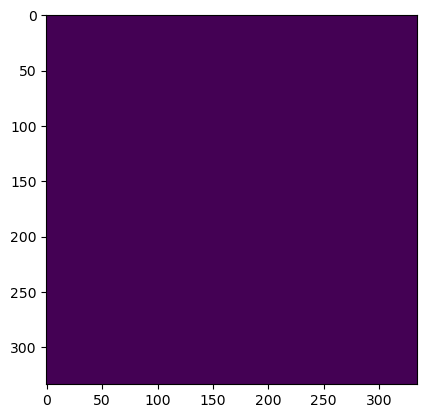

(1, 334, 335)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[1891276.6782703232, 483253.5737436873], [1891276.6782703232, 493253.5737436873], [1881276.6782703232, 493253.5737436873], [1881276.6782703232, 483253.5737436873], [1891276.6782703232, 48325

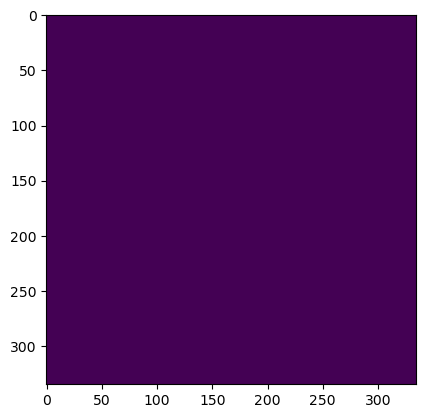

(1, 335, 335)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-939302.7050412172, 268757.5946114842], [-939302.7050412172, 278757.5946114842], [-949302.7050412172, 278757.5946114842], [-949302.7050412172, 268757.5946114842], [-939302.7050412172, 26875

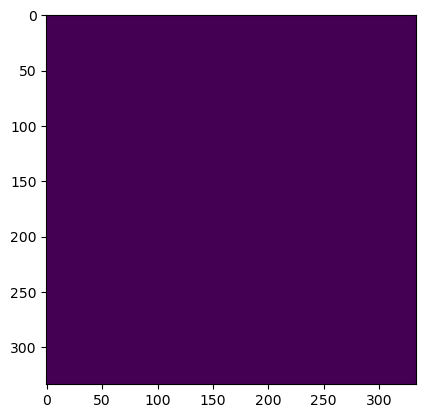

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-1260703.4847693257, 997238.594973179], [-1260703.4847693257, 1007238.594973179], [-1270703.4847693257, 1007238.594973179], [-1270703.4847693257, 997238.594973179], [-1260703.4847693257, 99

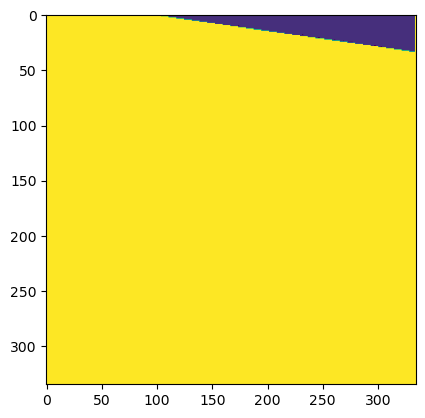

(1, 335, 335)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[2009834.2409001235, 2357839.0778731895], [2009834.2409001235, 2367839.0778731895], [1999834.2409001235, 2367839.0778731895], [1999834.2409001235, 2357839.0778731895], [2009834.2409001235, 2

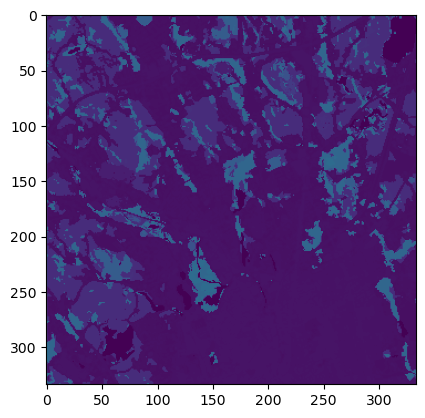

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-2187419.0311227655, 2889806.9565050765], [-2187419.0311227655, 2899806.9565050765], [-2197419.0311227655, 2899806.9565050765], [-2197419.0311227655, 2889806.9565050765], [-2187419.03112276

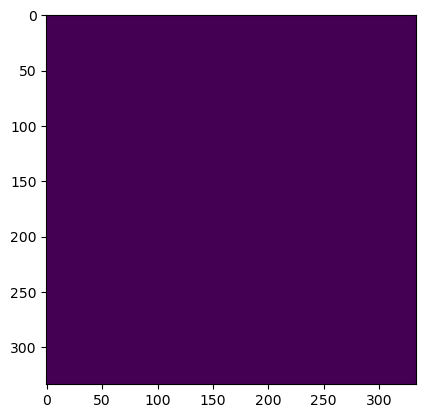

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-818456.072462026, 2109357.224962127], [-818456.072462026, 2119357.224962127], [-828456.072462026, 2119357.224962127], [-828456.072462026, 2109357.224962127], [-818456.072462026, 2109357.22

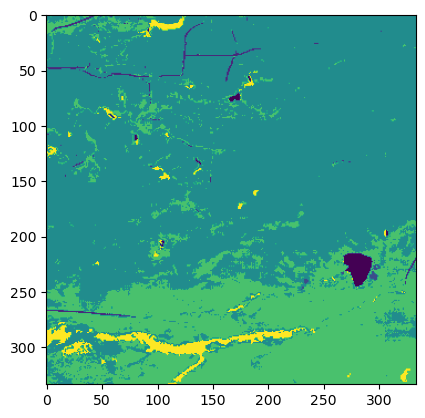

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-1733894.8530217651, 2184324.929199253], [-1733894.8530217651, 2194324.929199253], [-1743894.8530217651, 2194324.929199253], [-1743894.8530217651, 2184324.929199253], [-1733894.8530217651, 

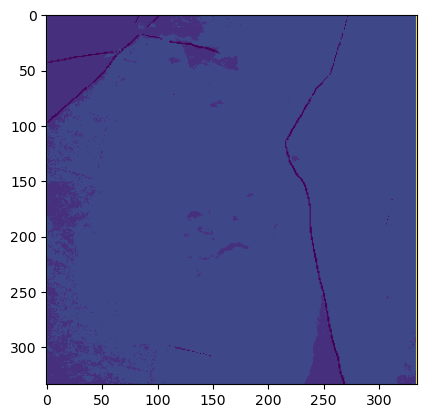

(1, 334, 335)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-1744789.240983378, 987111.6196776185], [-1744789.240983378, 997111.6196776185], [-1754789.240983378, 997111.6196776185], [-1754789.240983378, 987111.6196776185], [-1744789.240983378, 98711

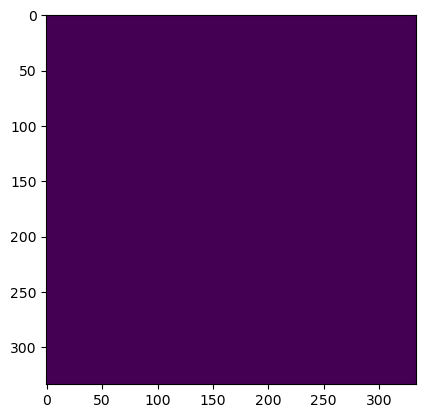

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[1576663.2179755857, 800632.1658536531], [1576663.2179755857, 810632.1658536531], [1566663.2179755857, 810632.1658536531], [1566663.2179755857, 800632.1658536531], [1576663.2179755857, 80063

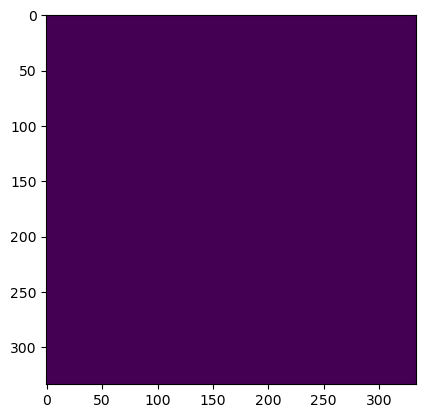

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-1267002.1339254486, 1093403.6136807194], [-1267002.1339254486, 1103403.6136807194], [-1277002.1339254486, 1103403.6136807194], [-1277002.1339254486, 1093403.6136807194], [-1267002.13392544

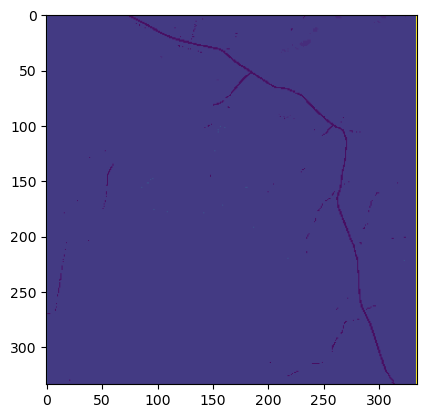

(1, 334, 335)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[884348.8548008939, 661128.2675052356], [884348.8548008939, 671128.2675052356], [874348.8548008939, 671128.2675052356], [874348.8548008939, 661128.2675052356], [884348.8548008939, 661128.267

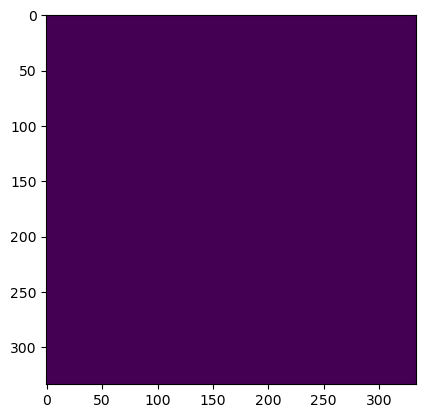

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-386988.3932217341, 3062920.7369705504], [-386988.3932217341, 3072920.7369705504], [-396988.3932217341, 3072920.7369705504], [-396988.3932217341, 3062920.7369705504], [-386988.3932217341, 3

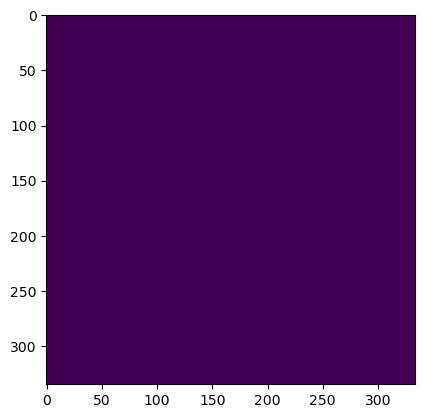

(1, 335, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[237846.88178396784, 3209434.9700392196], [237846.88178396784, 3219434.9700392196], [227846.88178396784, 3219434.9700392196], [227846.88178396784, 3209434.9700392196], [237846.88178396784, 3

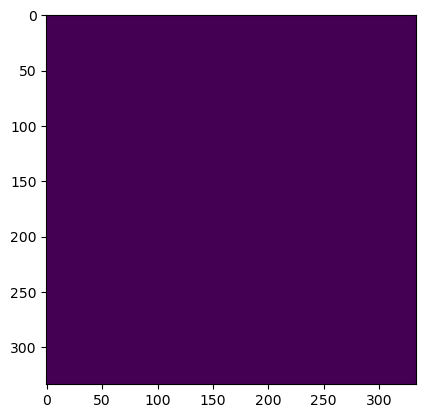

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[681475.5567147834, 2192477.969429971], [681475.5567147834, 2202477.969429971], [671475.5567147834, 2202477.969429971], [671475.5567147834, 2192477.969429971], [681475.5567147834, 2192477.96

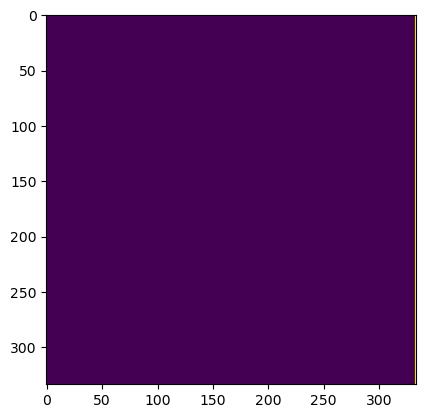

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-2100387.1560440767, 730250.5267230368], [-2100387.1560440767, 740250.5267230368], [-2110387.1560440767, 740250.5267230368], [-2110387.1560440767, 730250.5267230368], [-2100387.1560440767, 

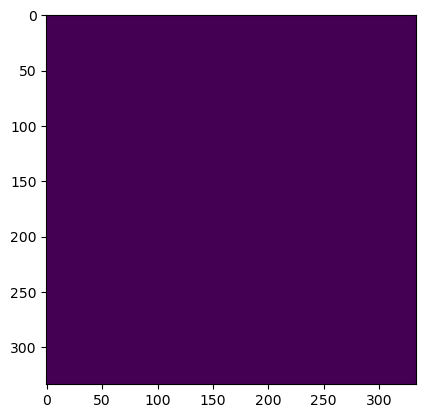

(1, 334, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-486416.11381639284, 1740398.936800138], [-486416.11381639284, 1750398.936800138], [-496416.11381639284, 1750398.936800138], [-496416.11381639284, 1740398.936800138], [-486416.11381639284, 

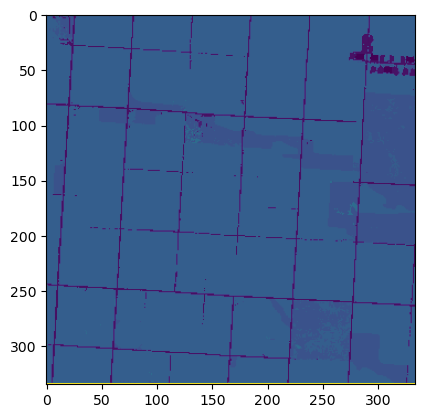

(1, 335, 334)
PROJCS["AEA        WGS84",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
BoundingBox(left=-2415585.0, bottom=164805.0, right=2384415.0, top=3314805.0)
| 30.00, 0.00,-2415585.00|
| 0.00,-30.00, 3314805.00|
| 0.00, 0.00, 1.00|
(105000, 160000)
[{'type': 'Polygon', 'coordinates': [[[-813587.634114062, 1060045.5395518336], [-813587.634114062, 1070045.5395518336], [-823587.634114062, 1070045.5395518336], [-823587.634114062, 1060045.5395518336], [-813587.634114062, 106004

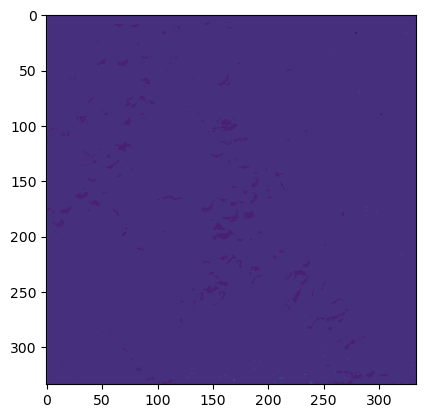

(1, 334, 334)


In [ ]:
# 1000m^2 / 30m^2 = 33.333 (Round to 34; add 34 to each value but `minx`)
# 5000m^2 / 30m^2 = 166.667 (Round to 167; add 167 to each value but `minx`)
# 10000m^2 / 30m^2 = 333.333 (Round to 334; add 334 to each value but `minx`)
# 30000m^2 / 30m^2 = 1000 (Add 1000 to each value but `minx`)
# 50000m^2 / 30m^2 = 1666.667 (Round to 1667; add 1667 to each value but `minx`)

# Shape of each raster is: (X: 161190, Y: 104424)
# Extents are (-2493045.0, 177285.0 : 2342655.0, 3310005.0)

# Sets of bounding boxes should be in sizes 50km^2, 30km^2, 10km^2, 5km^2, and 1km^2
# 30km is used as this is a small size that includes most of Spilogale's uncertainty ranges
# Each pixel is 30m^2

# A way to do this:
#    Randomly choose a point on the map for `minx`
#    Construct `miny`, `maxx`, and `maxy` from this using a fixed size (in degrees)
#    Create a bounding box using these values
#    Check if this bounding box overlaps with any others
#        If so, drop this box and regenerate
#    Calculate area of this bounding box (It should be in range of the sizes listed above)
#    Calculate sum of raster bands in each bounding box
#        If `Open Water` is greater than 5%, drop this bounding box and regenerate
#    Find counts of occurences in each bounding box
#    Add to table
#    Do this `n` number of times, for each year

from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import box
from fiona.crs import from_epsg
import geopandas as gpd
import json
import random

boxes = 5

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

for year, raster in rasters.items():
    land_cover = rasterio.open(raster)

    transformer = Transformer.from_crs('epsg:4326', land_cover.crs)

    print(land_cover.crs)
    print(land_cover.bounds)
    print(land_cover.transform)
    print(land_cover.shape)

    # Pick random point on raster
    minx = random.uniform(-2493045, 2342655)
    miny = random.uniform(177285, 3310005)

    # For an arbitrary plot
    # Determine miny, maxx, and maxy
    maxx = minx + 10000
    maxy = miny + 10000

    bbox = box(minx, miny, maxx, maxy)
    
    bbox = box(minx, miny, maxx, maxy)
    
    geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
    
    geo.to_crs(crs=land_cover.crs.data)

    coords = getFeatures(geo)
    print(coords)

    out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)

    out_meta = land_cover.meta.copy()

    #print(out_meta)

    #print(land_cover.crs.data)

    # epsg_code = int(land_cover.crs.data['init'][5:])

    # print(epsg_code)

    rasterio.plot.show(out_img)
    print(out_img.shape)

## Creating bounding boxes and find presence of each species in box
Sets of bounding boxes should be in sizes 50km^2, 30km^2, 10km^2, 5km^2, and 1km^2

30km is used as this is a small size that includes most of Spilogale's uncertainty ranges

Each pixel is 30m wide and 30m long; 900m^2

### Potential way to set this up:
- Randomly choose a point on the map for `minx`
- Construct `miny`, `maxx`, and `maxy` from this using a fixed size (in degrees)
- Create a bounding box using these values
- Check if this bounding box overlaps with any others
- -   If so, drop this box and regenerate
- Calculate area of this bounding box (It should be in range of the sizes listed above)
- Calculate sum of raster bands in each bounding box
- -   If `Open Water` is greater than 5%, drop this bounding box and regenerate
- Find counts of occurences in each bounding box
- Add to table
- Do this `n` number of times, for each year

Shape of each raster is: (X: 161190, Y: 104424)

Extents are (-2493045.0, 177285.0 : 2342655.0, 3310005.0)

In [ ]:
# Define globals and functions

from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import box
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas as gpd
import json
import random
import os

boxes = 100

rasters = {
    2000: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2000_CU_C1V0.tif',
    2001: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2001_CU_C1V0.tif',
    2002: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2002_CU_C1V0.tif',
    2003: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2003_CU_C1V0.tif',
    2004: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2004_CU_C1V0.tif',
    2005: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2005_CU_C1V0.tif',
    2006: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2006_CU_C1V0.tif',
    2007: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2007_CU_C1V0.tif',
    2008: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2008_CU_C1V0.tif',
    2009: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2009_CU_C1V0.tif',
    2010: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2010_CU_C1V0.tif',
    2011: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2011_CU_C1V0.tif',
    2012: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2012_CU_C1V0.tif',
    2013: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2013_CU_C1V0.tif',
    2014: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2014_CU_C1V0.tif',
    2015: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2015_CU_C1V0.tif',
    2016: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2016_CU_C1V0.tif',
    2017: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2017_CU_C1V0.tif',
    2018: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2018_CU_C1V0.tif',
    2019: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2019_CU_C1V0.tif',
    2020: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2020_CU_C1V0.tif',
    2021: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2021_CU_C1V0.tif',
    2022: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2022_CU_C1V0.tif',
    2023: '/media/store/Datasets/NLCD/Annual_NLCD_LndCov_2023_CU_C1V0.tif'
}

##### Run some tests trying to find sizes of boxes
# for year, raster in rasters.items():
#     land_cover = rasterio.open(raster)
#     transformer = Transformer.from_crs('epsg:4326', land_cover.crs)

#     for i in range (100):
#         minx = random.uniform(-2493045, 2342655)
#         miny = random.uniform(177285, 3310005)
        
#         maxx = minx + i
#         maxy = miny + i
        
#         bbox = box(minx, miny, maxx, maxy)
        
#         geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
        
#         geo.to_crs(crs=land_cover.crs.data)
        
#         coords = getFeatures(geo)
#         #print(coords)
        
#         out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)

#         shape = out_img.shape
#         pixel_dimensions = shape[1] * shape[2]

#         print(f'Additive is: {i}; pixel count: {pixel_dimensions}; area = {(pixel_dimensions * 900) / 1000}')
##### End test code

# From the above test code, we get the following values for sizes:
# 1km^2 = ~10, resulting in around 2 pixels
# 10km^2 = ~75, resulting in around 16 pixels
# 30km^2 = ~160, resulting in around 36 pixels
# 50km^2 = ~200, resulting in around 56 pixels
# 100km^2 = ~285, resulting in around 120 pixels
# 500km^2 =  ~680, resulting in around 576 pixels
# 1000km^2 = ~980, resulting in around 1100 pixels
# 5000km^2 = ~2220, resulting in around 5625 pixels
# 10000km^2 = ~3135, resultin in around 11130 pixels
# 50000km^2 = ~7060, resulting in around 55700 pixels
# 100000km^2 = ~9980, resulting in around 111556 pixels

# NOTE: Because our boxes are generated randomly, this can take an infinite amount of time
#       Using sizes less than 9980 will take an enormous amount of time
sizes = {
    # '100000km': 9980,
    # '50000km': 7060,
    #'10000km': 3135,
    '5000km': 2220,
    # '1000km': 980,
    # '500km': 680,
    # '100km': 285,
    # '50km': 200,
    # '30km': 160,
    # '10km': 75,
    # '5km': 42,
    # '1km': 10,
}

aggregate_landcovers = {
    1: 'Wetland',
    2: 'Agriculture',
    3: 'Developed',
    4: 'Forest',
    5: 'Shrub',
    6: 'Grassland',
}

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

def get_habitat_type(band):
    if band in [11, 12, 90, 95]:
        return 1
    elif band in [81, 82]:
        return 2
    elif band in [21, 22, 23, 24]:
        return 3
    elif band in [41, 42, 43]:
        return 4
    elif band in [51, 52]:
        return 5
    elif band in [71, 72, 73, 74]:
        return 6
    else:
        return 0

def critter_presence(latitude, longitude, transformer, box):
    easting, northing = transformer.transform(latitude, longitude)
    point = Point(easting, northing)

    if box.contains(point):
        return 1
    else:
        return 0

def critters_in_plot(box, transformer, occurences):
    # For species in occurences, return dictionary of species counds found in `img`
    species = occurences['species'].unique()
    
    critter_counts = dict.fromkeys(species)

    critter_df = occurences.copy()
    
    critter_df['present'] = critter_df.apply(lambda x: critter_presence(x['decimalLatitude'], x['decimalLongitude'], transformer, box), axis=1)

    for critter in species:
        amount = len(critter_df[(critter_df['species'] == critter) & (critter_df['present'] == 1)])
        critter_counts[critter] = amount
    
    return critter_counts

# Create Bounding Boxes using paired plots
- For this, we use each spotted skunk occurence as a point on the map.
- For each spotted skunk, we construct a bounding box and do the same animal and habitat counts.
- After we compute this, we find a point distant from the original and construct a bounding box from that, doing the same calculations
  - We want to make sure that this box does not include the spotted skunk we just sampled
  - We can still sample multiple spotted skunks in the same place, but we cannot sample the SAME spotted skunk we started with
- We could compute multiple bounding boxes from each spotted skunk if we wanted, and compute these values for different sizes of plots
- This process should be quicker than the previous, which took O(infinite) time.

In [ ]:
# The location of each spotted skunk is obscured
# The location of the skunk is somewhere in a 0.2 degree difference of it's coordinates
# Any point in that bounding box could have the skunk
#
# Step 1: Create bounding box from the lat & long
# Step 2: Find a point in that box, whose plot does not have invalid habitats
#     Repeat until a suitable point is found
# Step 3: Calculate landcover counts and species in plot as you would normally
# Step 4: Use this point as our basis for the paired plots
#
# Doing the above steps will remove the error where the basis plot contained too many invalid habitats, barring it from having any pairs
#
# For this, we will iterate through all spotted skunks
# Since there are so few spotted skunks, we will compile this all into one file
#   Each row will contain the associated year
# Each spotted skunk plot will be identified by the block number, and each paired plot will use the same block number but have '1' for the pair plot value

pairs = 1
total_plot_count = 0
species = aggregate_df['species'].unique()
for area, size in sizes.items():

    columns = {
            'BlockID': [],
            'BlockSizeSquareKM': [],
            'WetlandPixels': [],
            'WetlandPercent': [],
            'AgriculturePixels': [],
            'AgriculturePercent': [],
            'DevelopedPixels': [],
            'DevelopedPercent': [],
            'ForestPixels': [],
            'ForestPercent': [],
            'ShrubPixels': [],
            'ShrubPercent': [],
            'GrasslandPixels': [],
            'GrasslandPercent': [],
            'TotalPixels': [],
            'PairPlot': [],
            'Year': [],
        }

    # Dynamically add critter count keys to `columns`
    for critter in species:
        columns[f'#{critter}'] = []

    for year, raster in rasters.items():
        land_cover = rasterio.open(raster)
    
        transformer = Transformer.from_crs('epsg:4326', land_cover.crs)

        # Calculate plot data for spotted skunk
        spotted_skunks = aggregate_df[(aggregate_df['species'] == 'Spilogale putorius') & (aggregate_df['observationYear'] == year)].apply(lambda x: [x['gbifID'], x['decimalLatitude'], x['decimalLongitude']], axis=1)

        for gbif_id, lat, long in spotted_skunks:
            # Create a 0.2 degree bounding box from the `lat` and `long`
            valid_plot = False
            while valid_plot == False:
                new_lat = random.uniform(lat, lat + 0.2)
                new_long = random.uniform(long - 0.2, long)
                
                easting, northing = transformer.transform(new_lat, new_long)
    
                half = size / 2
    
                minx = easting - half
                miny = northing - half
                maxx = easting + half
                maxy = northing + half
    
                bbox = box(minx, miny, maxx, maxy)
                
                geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
            
                geo.to_crs(crs=land_cover.crs.data)
            
                coords = getFeatures(geo)
                #print(coords)
            
                out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)
        
                landcover_amounts = {
                    0: 0,
                    1: 0,
                    2: 0,
                    3: 0,
                    4: 0,
                    5: 0,
                    6: 0,
                }
    
                for row in out_img[0]:
                    uniques = np.unique(row, return_counts=True)
        
                    totals = dict(zip(*uniques))
        
                    for key, value in totals.items():
                        habitat_type = get_habitat_type(key)
                        landcover_amounts[habitat_type] = landcover_amounts[habitat_type] + value
        
                shape = out_img.shape
                pixel_dimensions = shape[1] * shape[2]
        
                # Drop and regenerate boxes that contain signicant empty values
                if ((landcover_amounts[0] / pixel_dimensions) * 100) >= 5.0:
                    print(f'ERROR: For spotted skunk with (id: {gbif_id}, lat: {lat}, long: {long}), found too many invalid habitats')
                    continue
                else:
                    print(f'NOTICE: Valid plot found for spotted skunk (id: {gbif_id}) using new lat: {new_lat} and new long {new_long}')
                    valid_plot = True

            # Exclude this skunk's GBIF ID from the dataframe
            critter_counts = critters_in_plot(bbox, transformer, aggregate_df[
                                              (aggregate_df['decimalLatitude'].between(new_lat - 0.5, new_lat + 0.5)) & 
                                              (aggregate_df['decimalLongitude'].between(new_long - 0.5, new_long + 0.5)) & 
                                              (aggregate_df['observationYear'] == year) & 
                                              (aggregate_df['gbifID'] != gbif_id)
                                            ])

            # Include this skunk in the critter counts
            count = critter_counts.get('Spilogale putorius')
            if count:
                critter_counts['Spilogale putorius'] = count + 1
            else:
                critter_counts['Spilogale putorius'] = 1
    
            # If all critter counts are 0, skip the rest and regenerate
            if all(value == 0 for value in critter_counts.values()):
                print(f'ERROR: For spotted skunk with (id: {gbif_id}, lat: {lat}, long: {long}), found no critters.')
                continue

            # Uncomment to see a visual of the area covered by the box
            # For large sizes, this will consume a lot of resources
            # rasterio.plot.show(out_img)
            
            # print(out_img.shape)
    
            columns['BlockID'].append(gbif_id)
            columns['BlockSizeSquareKM'].append(((pixel_dimensions) * 900) / 1000)
            columns['WetlandPixels'].append(landcover_amounts[1])
            columns['WetlandPercent'].append((landcover_amounts[1] / pixel_dimensions) * 100)
            
            columns['AgriculturePixels'].append(landcover_amounts[2])
            columns['AgriculturePercent'].append((landcover_amounts[2] / pixel_dimensions) * 100)
            
            columns['DevelopedPixels'].append(landcover_amounts[3])
            columns['DevelopedPercent'].append((landcover_amounts[3] / pixel_dimensions) * 100)
            
            columns['ForestPixels'].append(landcover_amounts[4])
            columns['ForestPercent'].append((landcover_amounts[4] / pixel_dimensions) * 100)
            
            columns['ShrubPixels'].append(landcover_amounts[5])
            columns['ShrubPercent'].append((landcover_amounts[5] / pixel_dimensions) * 100)
            
            columns['GrasslandPixels'].append(landcover_amounts[6])
            columns['GrasslandPercent'].append((landcover_amounts[6] / pixel_dimensions) * 100)
            
            columns['TotalPixels'].append(pixel_dimensions)
            columns['PairPlot'].append(0)
            columns['Year'].append(year)
            
            # For critters not in `critter_counts`, set to 0
            for critter in species:
                count = critter_counts.get(critter)
                
                if count:
                    columns[f'#{critter}'].append(count)
                else:
                    columns[f'#{critter}'].append(0)
            

            unique_randoms = {} # Random values we used in the past; our next random value should not be found here
            index = 0 # Which pair were are currently on
            attempts = 0 # Current count of attempts (if > 0, we found a plot that had no critters)
            attempts_max = 100 # Maximum number of attempts we can have before settling on an empty (no critters) plot
            while index != pairs:
                pair_easting, pair_northing = easting, northing

                # Move the center point `size` units away from center point
                #   For this, divide `size` in two by a random amount and add to easting and northing
                # Increase distance from center point by an arbitrary amount if we get too many plots without critters
                additive = 0
                if attempts == 10:
                    additive = size * .1
                elif attempts == 50:
                    additive = size * .25
                elif attempts == 80:
                    additive = size * .50
                else: 
                    additive = size
                
                unique_rand = False
                rand = 0
                while unique_rand == False:
                    rand = random.uniform(size/2 + additive, size + additive)
                    if rand not in unique_randoms:
                        unique_rand = True

                x = rand
                y = size - rand

                # Negate x and y by chance
                if random.randint(0, 100) % 2 == 0:
                    x = -abs(x)
                if random.randint(0, 100) % 2 == 0:
                    y = -abs(y)

                # Move center point
                pair_easting = pair_easting + x
                pair_northing = pair_northing + y
                
                minx = pair_easting - half
                miny = pair_northing - half
                maxx = pair_easting + half
                maxy = pair_northing + half

                bbox = box(minx, miny, maxx, maxy)
            
                geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
            
                geo.to_crs(crs=land_cover.crs.data)
            
                coords = getFeatures(geo)
            
                out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)
        
                landcover_amounts = {
                    0: 0,
                    1: 0,
                    2: 0,
                    3: 0,
                    4: 0,
                    5: 0,
                    6: 0,
                }
        
                for row in out_img[0]:
                    uniques = np.unique(row, return_counts=True)
        
                    totals = dict(zip(*uniques))
        
                    for key, value in totals.items():
                        habitat_type = get_habitat_type(key)
                        landcover_amounts[habitat_type] = landcover_amounts[habitat_type] + value
        
                shape = out_img.shape
                pixel_dimensions = shape[1] * shape[2]
        
                # Drop and regenerate boxes that contain signicant empty values
                if ((landcover_amounts[0] / pixel_dimensions) * 100) >= 5.0:
                    continue

                # Convert the pair easting and northings to lat and long so we can limit our search to animals in that plot
                pair_lat, pair_long = transformer.transform(pair_easting, pair_northing, direction='INVERSE')
                
                critter_counts = critters_in_plot(bbox, transformer, aggregate_df[
                                                  (aggregate_df['decimalLatitude'].between(pair_lat - 0.5, pair_lat + 0.5)) & 
                                                  (aggregate_df['decimalLongitude'].between(pair_long - 0.5, pair_long + 0.5)) & 
                                                  (aggregate_df['observationYear'] == year) & 
                                                  (aggregate_df['gbifID'] != gbif_id)
                                                ])
        
                # If all critter counts are 0, skip unless we reached our max attempts, then add this plot
                if all(value == 0 for value in critter_counts.values()):
                    if attempts != attempts_max:
                        attempts = attempts + 1
                        continue
                    else:
                        print(f'NOTICE: Reached max paired-plot attempts for spotted skunk with id: {gbif_id}')
        
                # Uncomment to see a visual of the area covered by the box
                # For large sizes, this will consume a lot of resources
                # rasterio.plot.show(out_img)
                
                # print(out_img.shape)
        
                columns['BlockID'].append(gbif_id)
                columns['BlockSizeSquareKM'].append(((pixel_dimensions) * 900) / 1000)
                columns['WetlandPixels'].append(landcover_amounts[1])
                columns['WetlandPercent'].append((landcover_amounts[1] / pixel_dimensions) * 100)
                
                columns['AgriculturePixels'].append(landcover_amounts[2])
                columns['AgriculturePercent'].append((landcover_amounts[2] / pixel_dimensions) * 100)
                
                columns['DevelopedPixels'].append(landcover_amounts[3])
                columns['DevelopedPercent'].append((landcover_amounts[3] / pixel_dimensions) * 100)
                
                columns['ForestPixels'].append(landcover_amounts[4])
                columns['ForestPercent'].append((landcover_amounts[4] / pixel_dimensions) * 100)
                
                columns['ShrubPixels'].append(landcover_amounts[5])
                columns['ShrubPercent'].append((landcover_amounts[5] / pixel_dimensions) * 100)
                
                columns['GrasslandPixels'].append(landcover_amounts[6])
                columns['GrasslandPercent'].append((landcover_amounts[6] / pixel_dimensions) * 100)
                
                columns['TotalPixels'].append(pixel_dimensions)
                columns['PairPlot'].append(1)
                columns['Year'].append(year)

                # For critters not in `critter_counts`, set to 0
                for critter in species:
                    count = critter_counts.get(critter)
    
                    if count:
                        columns[f'#{critter}'].append(count)
                    else:
                        columns[f'#{critter}'].append(0)

                index += 1
                attempts = 0
                print(f'NOTICE: Finished pair for skunk with (id: {gbif_id}')
                
                total_plot_count += 1
                if total_plot_count % 5 == 0:
                    plots_df = pd.DataFrame(data=columns)
                    plots_df.iloc[total_plot_count-5:total_plot_count].to_csv(f'./DataExports/Occurences-{area}.csv', index=False, mode='a', header=False)

    plots_df = pd.DataFrame(data=columns)
    plots_df.to_csv(f'./PairedPlotDataExports/Occurences-{area}.csv', index=False)

In [ ]:
# Same as above but we remove years and look only at occurences of the species

pairs = 1

for area, size in sizes.items():

    columns = {
            'BlockID': [],
            'BlockSizeSquareKM': [],
            'PairPlot': [],
        }

    # Dynamically add critter count keys to `columns`
    for critter in aggregate_df['species'].unique():
        columns[f'#{critter}'] = []

    # Open most recent year of NLCD; we just need any raster loaded here to calculate plot sizes
    land_cover = rasterio.open(rasters[2021])

    transformer = Transformer.from_crs('epsg:4326', land_cover.crs)

    # Calculate plot data for spotted skunk
    spotted_skunks = aggregate_df[aggregate_df['species'] == 'Spilogale putorius'].apply(lambda x: [x['gbifID'], x['decimalLatitude'], x['decimalLongitude']], axis=1)

    for gbif_id, lat, long in spotted_skunks:
        # Create a 0.2 degree bounding box from the `lat` and `long`
        valid_plot = False
        while valid_plot == False:
            new_lat = random.uniform(lat, lat + 0.2)
            new_long = random.uniform(long - 0.2, long)
            
            easting, northing = transformer.transform(new_lat, new_long)

            half = size / 2

            minx = easting - half
            miny = northing - half
            maxx = easting + half
            maxy = northing + half

            bbox = box(minx, miny, maxx, maxy)
            
            geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
        
            geo.to_crs(crs=land_cover.crs.data)
        
            coords = getFeatures(geo)
        
            out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)
    
            landcover_amounts = {
                0: 0,
                1: 0,
                2: 0,
                3: 0,
                4: 0,
                5: 0,
                6: 0,
            }

            for row in out_img[0]:
                uniques = np.unique(row, return_counts=True)
    
                totals = dict(zip(*uniques))
    
                for key, value in totals.items():
                    habitat_type = get_habitat_type(key)
                    landcover_amounts[habitat_type] = landcover_amounts[habitat_type] + value
    
            shape = out_img.shape
            pixel_dimensions = shape[1] * shape[2]
    
            # Drop and regenerate boxes that contain significant empty values
            if ((landcover_amounts[0] / pixel_dimensions) * 100) >= 5.0:
                print(f'ERROR: For spotted skunk with (id: {gbif_id}, lat: {lat}, long: {long}), found too many invalid habitats')
                continue
            else:
                print(f'NOTICE: Valid plot found for spotted skunk (id: {gbif_id}) using new lat: {new_lat} and new long {new_long}')
                valid_plot = True

        # Exclude this skunk's GBIF ID from the dataframe
        critter_counts = critters_in_plot(bbox, transformer, aggregate_df[aggregate_df['gbifID'] != gbif_id])

        # Include this skunk in the critter counts
        count = critter_counts.get('Spilogale putorius')
        if count:
            critter_counts['Spilogale putorius'] = count + 1
        else:
            critter_counts['Spilogale putorius'] = 1

        # If all critter counts are 0, skip the rest and regenerate
        if all(value == 0 for value in critter_counts.values()):
            print(f'ERROR: For spotted skunk with (id: {gbif_id}, lat: {lat}, long: {long}), found no critters.')
            continue

        # Uncomment to see a visual of the area covered by the box
        # For large sizes, this will consume a lot of resources
        # rasterio.plot.show(out_img)
        
        # print(out_img.shape)

        columns['BlockID'].append(gbif_id)
        columns['BlockSizeSquareKM'].append(((pixel_dimensions) * 900) / 1000)
        columns['PairPlot'].append(0)

        for key, val in critter_counts.items():
            columns[f'#{key}'].append(val)

        unique_randoms = {} # Random values we used in the past; our next random value should not be found here
        index = 0 # Which pair were are currently on
        attempts = 0 # Current count of attempts (if > 0, we found a plot that had no critters)
        attempts_max = 100 # Maximum number of attempts we can have before settling on an empty (no critters) plot
        while index != pairs:
            pair_easting, pair_northing = easting, northing
            
            # Move the center point `size` units away from center point
            #   For this, divide `size` in two by a random amount and add to easting and northing
            # Increase distance from center point by an arbitrary amount if we get too many plots without critters
            additive = 0
            if attempts == 10:
                additive = size * .1
            elif attempts == 50:
                additive = size * .25
            elif attempts == 80:
                additive = size * .50
            else: 
                additive = size
            
            unique_rand = False
            rand = 0
            while unique_rand == False:
                rand = random.uniform(size/2 + additive, size + additive)
                if rand not in unique_randoms:
                    unique_rand = True

            x = rand
            y = size - rand

            # Negate x and y by chance
            if random.randint(0, 100) % 2 == 0:
                x = -abs(x)
            if random.randint(0, 100) % 2 == 0:
                y = -abs(y)

            # Move center point
            pair_easting = pair_easting + x
            pair_northing = pair_northing + y
            
            minx = pair_easting - half
            miny = pair_northing - half
            maxx = pair_easting + half
            maxy = pair_northing + half

            bbox = box(minx, miny, maxx, maxy)
        
            geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
        
            geo.to_crs(crs=land_cover.crs.data)
        
            coords = getFeatures(geo)
        
            out_img, out_transform = mask(dataset=land_cover, shapes=coords, crop=True)
    
            shape = out_img.shape
            pixel_dimensions = shape[1] * shape[2]
    
            critter_counts = critters_in_plot(bbox, transformer, aggregate_df[aggregate_df['gbifID'] != gbif_id])
    
            # If all critter counts are 0, skip unless we reached our max attempts, then add this plot
            if all(value == 0 for value in critter_counts.values()):
                if attempts != attempts_max:
                    attempts = attempts + 1
                    continue
                else:
                    print(f'NOTICE: Reached max paired-plot attempts for spotted skunk with id: {gbif_id}')
    
            # Uncomment to see a visual of the area covered by the box
            # For large sizes, this will consume a lot of resources
            # rasterio.plot.show(out_img)
            
            # print(out_img.shape)
    
            columns['BlockID'].append(gbif_id)
            columns['BlockSizeSquareKM'].append(((pixel_dimensions) * 900) / 1000)
            columns['PairPlot'].append(1)
    
            for key, val in critter_counts.items():
                columns[f'#{key}'].append(val)

            index += 1
            attempts = 0
            print(f'NOTICE: Finished pair for skunk with (id: {gbif_id}')

            plots_df = pd.DataFrame(data=columns)
            print(plots_df)

    plots_df = pd.DataFrame(data=columns)
    plots_df.to_csv(f'./PairedPlotOccurences/Species-{area}.csv', index=False)